**Pore Pressure Calculation using Porosity**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import lasio


In [2]:
las=lasio.read(r"C:\Users\RAJKUMAR MONDAL\Downloads\gorgonichthys_1_wire_public_2010_sdb (1).las")
df=las.df().reset_index()
print(las.curves)

Mnemonic  Unit  Value  Description                                                            
--------  ----  -----  -----------                                                            
DEPTH     M                                                                                   
BS        IN           Values changed using TEXT_EDIT                                         
CALI      IN           Values changed using TEXT_EDIT                                         
DENS      G/C3         5       Bulk Density                                                   
DENSC     G/C3         12      Bulk Density Correction                                        
DRHO      G/C3         12      Bulk Density Correction                                        
DT        US/F         Curve clear from 3924.64 to 3930.54                                    
DTCO      US/F         Curve clear from 3924.64 to 3930.54                                    
DTSH      US/F         Curve clear from 3872.27 to

In [3]:
df1 = pd.read_fwf(r"C:\Users\RAJKUMAR MONDAL\Downloads\GORGONICHTHYS-1_marker_edit.txt")

# Print the DataFrame
print(df1)



   Marker    TVDMSL(m)
0      SB   262.974288
1   TOLIV   696.158274
2    TGRB  1089.572078
3    TBSS  1489.536656
4    TFEN  1963.180860
5    IFEN  2415.510315
6   KAPTS  3266.709602
7    KBAR  3618.384712
8    TUBS  3928.329044
9    BLBS  4090.488805
10   JOXF  4243.200000
11   PF13  4450.360316


In [4]:
logs1=['DEPTH','BS','CALI','GR','DT','RHOB','TNPH','RESS','RESD','DTSH','VPVS']
p11=df[logs1]
p=p11.dropna()
p.isna().sum()
p.reset_index()
p

DEPTH     BS     CALI        GR       DT    RHOB     TNPH    RESS  \
25792  3930.7008  12.25  12.4842  140.9656  77.1491  2.8126  0.28823  4.6900   
25793  3930.8532  12.25  12.5407  150.2494  76.1534  2.8043  0.29812  4.0761   
25794  3931.0056  12.25  12.5519  150.4504  75.6770  2.7804  0.30283  3.9563   
25795  3931.1580  12.25  12.5181  142.4614  76.5705  2.7452  0.30499  4.4026   
25796  3931.3104  12.25  12.4842  137.6260  77.0579  2.7459  0.27262  4.9909   
...          ...    ...      ...       ...      ...     ...      ...     ...   
31099  4739.4876   8.50   8.5145  187.6141  80.6610  2.6756  0.30019  5.9078   
31100  4739.6400   8.50   8.5145  189.0984  80.0609  2.6846  0.29695  5.8805   
31101  4739.7924   8.50   8.5040  185.5540  78.9646  2.6716  0.29964  5.8813   
31102  4739.9448   8.50   8.4874  183.1134  78.6658  2.6791  0.30103  5.9311   
31103  4740.0972   8.50   8.4581  184.0362  78.1588  2.6926  0.30509  5.9292   

         RESD      DTSH    VPVS  
25792  3.8753  131.7044  1.6155  
25793  3.5553  132.6980  1.6490  
25794  3.4605  131.2091  1.7020  
25795  3.7306  130.4003  1.6768  
25796  4.1313  128.8238  1.6990  
...       ...       ...     ...  
31099  5.2892  153.4561  1.8998  
31100  5.2901  153.2509  1.9116  
31101  5.3035  153.2724  1.9401  
31102  5.3424  155.4383  1.9750  
31103  5.3567  156.8542  2.0162  

[5154 rows x 11 columns]

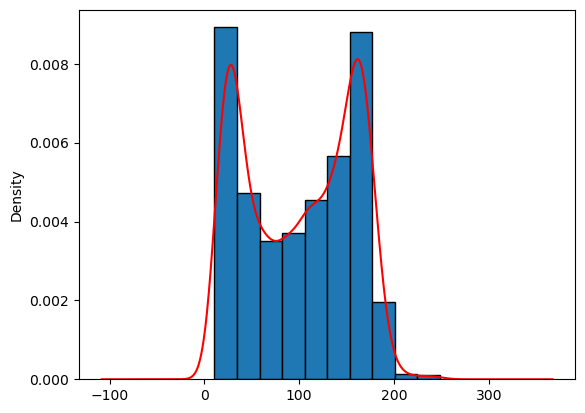

In [5]:
p.GR.plot(kind="hist",edgecolor="black",density=True)
p.GR.plot(kind="kde",color="red")
p5=p.GR.quantile(0.5)
p95=p.GR.quantile(0.95)

In [6]:
#plt.subplots(figsize=(5,9))
def vsh(gr_min,gr_max,gr_log):
    return((gr_log-gr_min)/(gr_max-gr_min))
x1=vsh(p5,p95,p.GR)
p['x1']=x1



C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_6904\3716003296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['x1']=x1


In [7]:
da=p[p['GR']>=0.4]
da

DEPTH     BS     CALI        GR       DT    RHOB     TNPH    RESS  \
25792  3930.7008  12.25  12.4842  140.9656  77.1491  2.8126  0.28823  4.6900   
25793  3930.8532  12.25  12.5407  150.2494  76.1534  2.8043  0.29812  4.0761   
25794  3931.0056  12.25  12.5519  150.4504  75.6770  2.7804  0.30283  3.9563   
25795  3931.1580  12.25  12.5181  142.4614  76.5705  2.7452  0.30499  4.4026   
25796  3931.3104  12.25  12.4842  137.6260  77.0579  2.7459  0.27262  4.9909   
...          ...    ...      ...       ...      ...     ...      ...     ...   
31099  4739.4876   8.50   8.5145  187.6141  80.6610  2.6756  0.30019  5.9078   
31100  4739.6400   8.50   8.5145  189.0984  80.0609  2.6846  0.29695  5.8805   
31101  4739.7924   8.50   8.5040  185.5540  78.9646  2.6716  0.29964  5.8813   
31102  4739.9448   8.50   8.4874  183.1134  78.6658  2.6791  0.30103  5.9311   
31103  4740.0972   8.50   8.4581  184.0362  78.1588  2.6926  0.30509  5.9292   

         RESD      DTSH    VPVS        x1  
25792  3.8753  131.7044  1.6155  0.486765  
25793  3.5553  132.6980  1.6490  0.618146  
25794  3.4605  131.2091  1.7020  0.620991  
25795  3.7306  130.4003  1.6768  0.507933  
25796  4.1313  128.8238  1.6990  0.439504  
...       ...       ...     ...       ...  
31099  5.2892  153.4561  1.8998  1.146920  
31100  5.2901  153.2509  1.9116  1.167925  
31101  5.3035  153.2724  1.9401  1.117766  
31102  5.3424  155.4383  1.9750  1.083227  
31103  5.3567  156.8542  2.0162  1.096287  

[5154 rows x 12 columns]

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_19856\2334630443.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


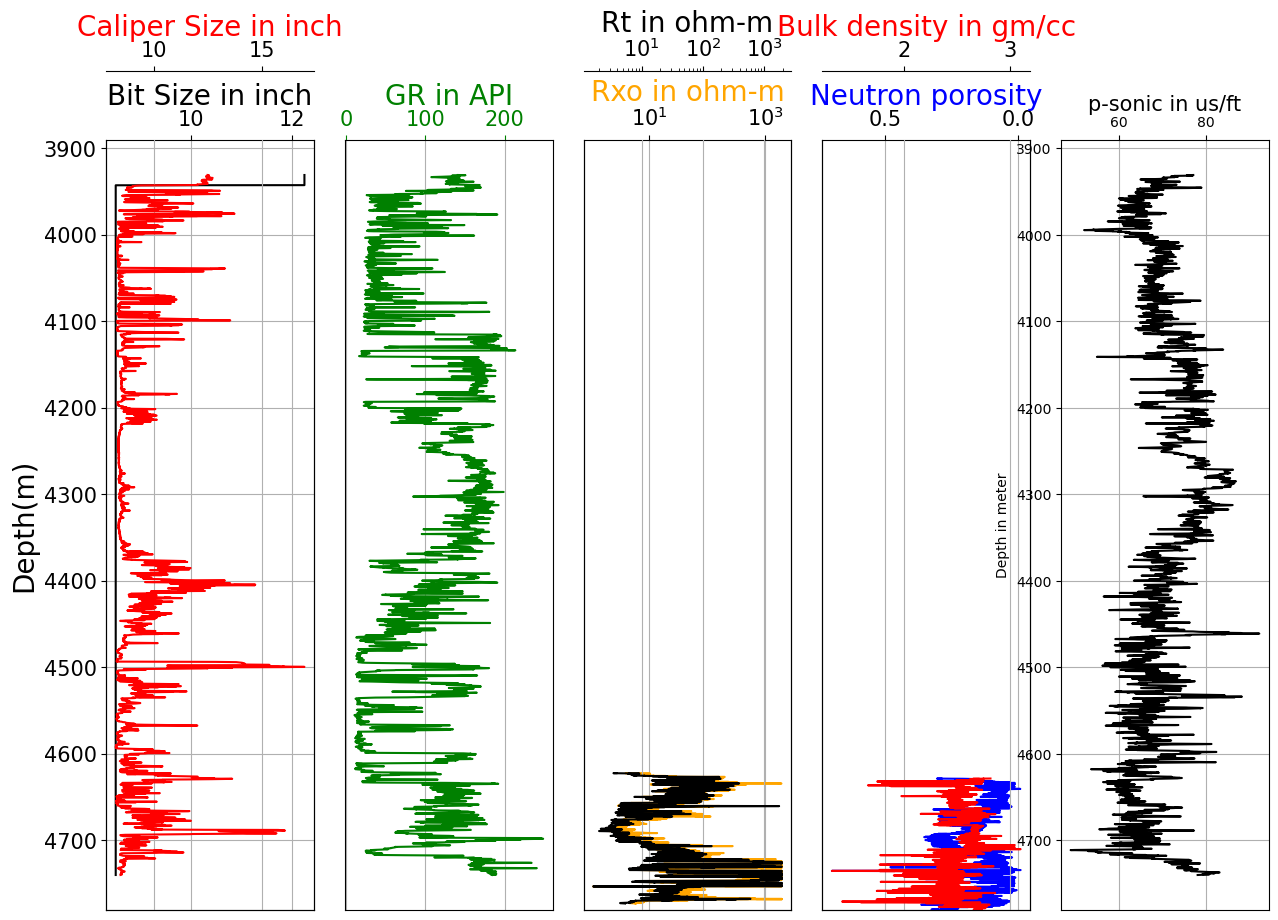

In [23]:
plt.subplots(figsize=(15,10))
fig=plt.subplots_adjust(wspace=.15)

ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2=ax1.twiny()
ax3=plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax4=plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5=ax4.twiny()
ax6=plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7=ax6.twiny()
ax8=plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)


ax1.plot(da['BS'],da['DEPTH'],color='k')
ax1.set_xlabel('Bit Size in inch',color='k',fontsize='20')
ax1.set_ylabel('Depth(m)',fontsize='20')
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.tick_params(axis="x",labelsize=15)
ax1.tick_params(axis="y",labelsize=15)
ax1.invert_yaxis()
ax1.grid()

ax2.plot(da["CALI"],da['DEPTH'],color="red")
ax2.set_xlabel('Caliper Size in inch',color='red',fontsize='20')
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.spines["top"].set_position(("axes",1.09))
ax2.tick_params(axis="x",labelsize=15)
ax2.tick_params(axis="y",labelsize=15)
#ax2.set_yticks([])
ax2.grid()

ax3.plot(da['GR'],da['DEPTH'],color='green')
ax3.set_xlabel('GR in API',color='green',fontsize='20')
#ax3.set_ylabel('Depth(m)',fontsize='20')
ax3.tick_params(axis='x', colors="green")
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.tick_params(axis="x",labelsize=15)
ax3.tick_params(axis="y",labelsize=15)
ax3.set_yticks([])
ax3.invert_yaxis()
ax3.grid()


ax4.plot(da['RESS'],da['DEPTH'],color='orange')
ax4.semilogx()
ax4.set_xlabel('Rxo in ohm-m',color='orange',fontsize='20')
##ax4.set_ylabel('Depth in meter',fontsize='20')
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.tick_params(axis="x",labelsize=15)
ax4.tick_params(axis="y",labelsize=15)
ax4.set_yticks([])
ax4.set_ylim(0,p11['DEPTH'].max())
ax4.invert_yaxis()
ax4.grid()


ax5.plot(da['RESD'],da['DEPTH'],color='k')
ax5.semilogx()
ax5.set_xlabel('Rt in ohm-m',color='k',fontsize='20')
#ax5.set_ylabel('Depth in meter',fontsize='20')
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.spines["top"].set_position(("axes",1.09))
ax5.tick_params(axis="x",labelsize=15)
ax5.tick_params(axis="y",labelsize=15)
ax5.set_yticks([])
#ax5.invert_yaxis()
ax5.grid()

ax6.plot(da['TNPH'],da['DEPTH'],color='blue')
ax6.set_xlabel('Neutron porosity',color='blue',fontsize='20')
#ax6.set_ylabel('Depth in meter',fontsize='20')
ax6.xaxis.set_label_position("top")
ax6.xaxis.set_ticks_position("top")
ax6.tick_params(axis="x",labelsize=15)
ax6.tick_params(axis="y",labelsize=15)
ax6.set_yticks([])
ax6.set_ylim(0,da['DEPTH'].max())
ax6.invert_yaxis()
ax6.invert_xaxis()
ax6.grid()

ax7.plot(da['RHOB'],da['DEPTH'],color='red')
ax7.set_xlabel('Bulk density in gm/cc',color='red',fontsize='20')
#ax7.set_ylabel('Depth in meter',fontsize='20')
ax7.xaxis.set_label_position("top")
ax7.xaxis.set_ticks_position("top")
ax7.spines["top"].set_position(("axes",1.09))
ax7.tick_params(axis="x",labelsize=15)
ax7.tick_params(axis="y",labelsize=15)
ax7.set_yticks([])

#ax7.invert_yaxis()
ax7.grid()


ax8.plot(da['DT'],da['DEPTH'],color='k')
ax8.set_xlabel('p-sonic in us/ft',color='k',fontsize='15')
ax8.set_ylabel('Depth in meter')
ax8.xaxis.set_label_position("top")
ax8.xaxis.set_ticks_position("top")
ax8.invert_yaxis()
ax8.grid()


# ax9.plot(p11['VPVS'],p11['DEPTH'],color='k')
# ax9.set_xlabel('Vp/Vs ',color='k',fontsize='15')
# ax9.set_ylabel('Depth in meter')
# ax9.xaxis.set_label_position("top")
# ax9.xaxis.set_ticks_position("top")
# ax9.invert_yaxis()
# ax9.grid()



# ax10.plot(p11['DTSH'],p11['DEPTH'],color='k')
# ax10.set_xlabel('Vs ',color='k',fontsize='15')
# ax10.set_ylabel('Depth in meter')
# ax10.xaxis.set_label_position("top")
# ax10.xaxis.set_ticks_position("top")
# ax10.invert_yaxis()
# ax10.grid()





C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\3255897927.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(p.corr(method = 'spearman') , dtype=np.bool)


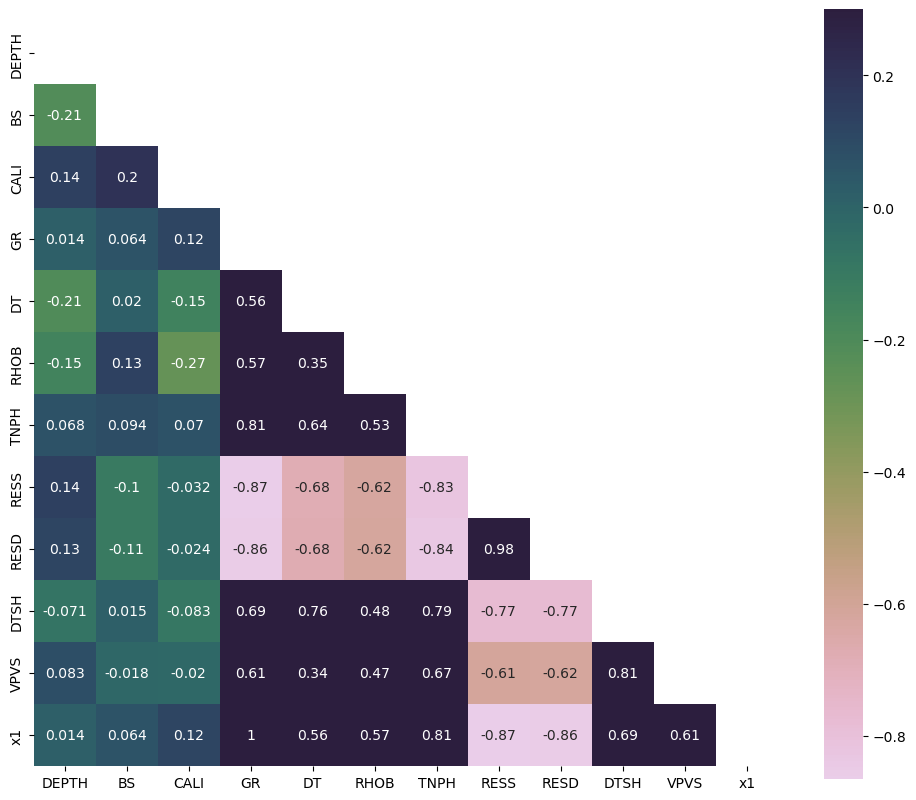

In [17]:
import seaborn as sns
mask = np.zeros_like(p.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(p.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)
plt.savefig("p2.png",dpi=400)
plt.show()

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\1119016471.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)


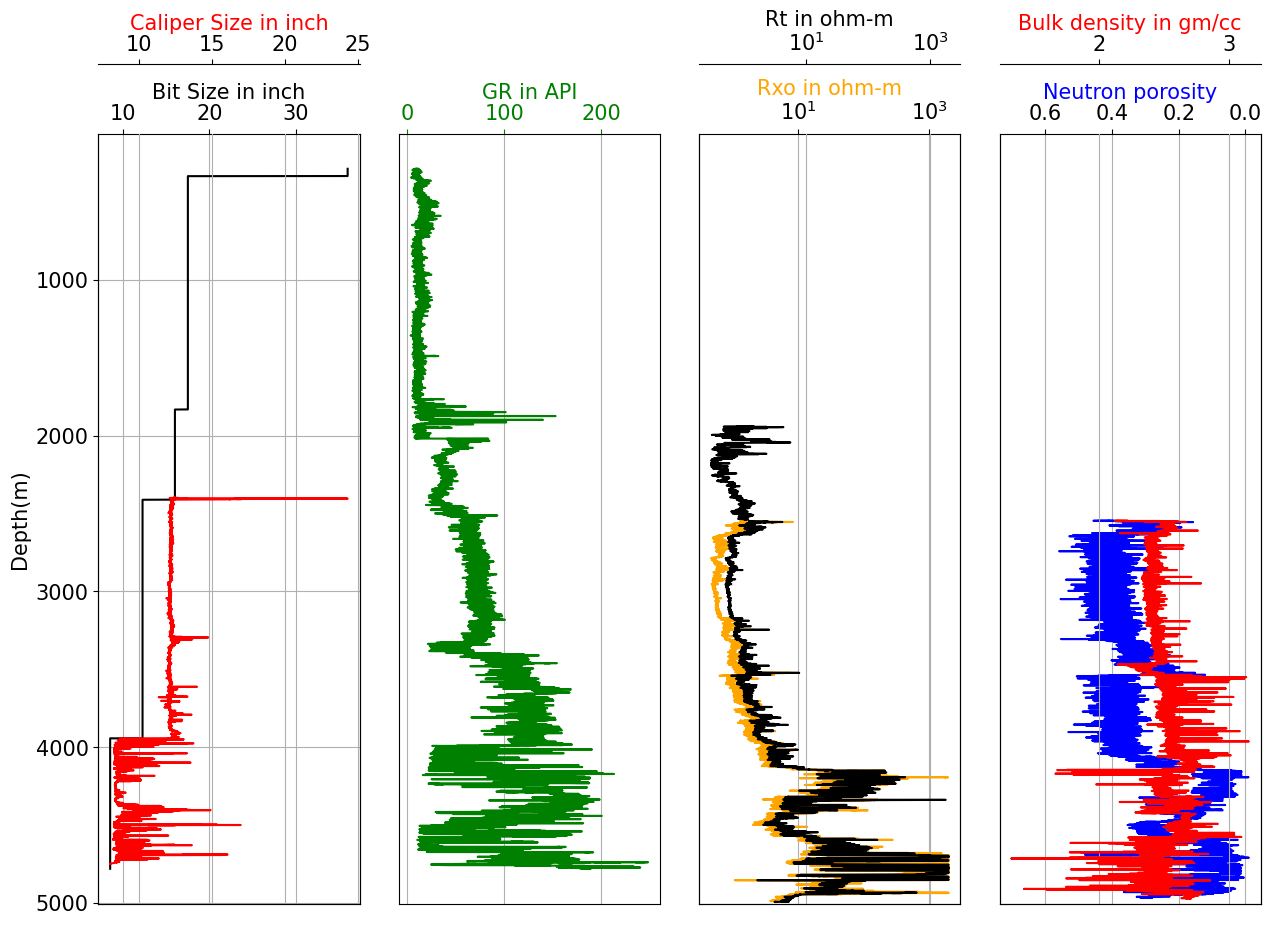

In [19]:
plt.subplots(figsize=(15,10))
fig=plt.subplots_adjust(wspace=.15)

ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax2=ax1.twiny()
ax3=plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax4=plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax5=ax4.twiny()
ax6=plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)
ax7=ax6.twiny()



ax1.plot(p11['BS'],p11['DEPTH'],color='k')
ax1.set_xlabel('Bit Size in inch',color='k',fontsize='15')
ax1.set_ylabel('Depth(m)',fontsize='15')
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.tick_params(axis="x",labelsize=15)
ax1.tick_params(axis="y",labelsize=15)
ax1.invert_yaxis()
ax1.grid()

ax2.plot(p11["CALI"],p11['DEPTH'],color="red")
ax2.set_xlabel('Caliper Size in inch',color='red',fontsize='15')
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.spines["top"].set_position(("axes",1.09))
ax2.tick_params(axis="x",labelsize=15)
ax2.tick_params(axis="y",labelsize=15)
#ax2.set_yticks([])
ax2.grid()

ax3.plot(p11['GR'],p11['DEPTH'],color='green')
ax3.set_xlabel('GR in API',color='green',fontsize='15')
#ax3.set_ylabel('Depth(m)',fontsize='20')
ax3.tick_params(axis='x', colors="green")
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.tick_params(axis="x",labelsize=15)
ax3.tick_params(axis="y",labelsize=15)
ax3.set_yticks([])
ax3.invert_yaxis()
ax3.grid()


ax4.plot(p11['RESS'],p11['DEPTH'],color='orange')
ax4.semilogx()
ax4.set_xlabel('Rxo in ohm-m',color='orange',fontsize='15')
##ax4.set_ylabel('Depth in meter',fontsize='20')
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.tick_params(axis="x",labelsize=15)
ax4.tick_params(axis="y",labelsize=15)
ax4.set_yticks([])
ax4.set_ylim(0,p11['DEPTH'].max())
ax4.invert_yaxis()
ax4.grid()


ax5.plot(p11['RESD'],p11['DEPTH'],color='k')
ax5.semilogx()
ax5.set_xlabel('Rt in ohm-m',color='k',fontsize='15')
#ax5.set_ylabel('Depth in meter',fontsize='20')
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.spines["top"].set_position(("axes",1.09))
ax5.tick_params(axis="x",labelsize=15)
ax5.tick_params(axis="y",labelsize=15)
ax5.set_yticks([])
#ax5.invert_yaxis()
ax5.grid()

ax6.plot(p11['TNPH'],p11['DEPTH'],color='blue')
ax6.set_xlabel('Neutron porosity',color='blue',fontsize='15')
#ax6.set_ylabel('Depth in meter',fontsize='20')
ax6.xaxis.set_label_position("top")
ax6.xaxis.set_ticks_position("top")
ax6.tick_params(axis="x",labelsize=15)
ax6.tick_params(axis="y",labelsize=15)
ax6.set_yticks([])
ax6.set_ylim(0,p11['DEPTH'].max())
ax6.invert_yaxis()
ax6.invert_xaxis()
ax6.grid()

ax7.plot(p11['RHOB'],p11['DEPTH'],color='red')
ax7.set_xlabel('Bulk density in gm/cc',color='red',fontsize='15')
#ax7.set_ylabel('Depth in meter',fontsize='20')
ax7.xaxis.set_label_position("top")
ax7.xaxis.set_ticks_position("top")
ax7.spines["top"].set_position(("axes",1.09))
ax7.tick_params(axis="x",labelsize=15)
ax7.tick_params(axis="y",labelsize=15)
ax7.set_yticks([])

#ax7.invert_yaxis()
ax7.grid()


# ax8.plot(p11['DT'],p11['DEPTH'],color='k')
# ax8.set_xlabel('p-sonic in us/ft',color='k',fontsize='15')
# ax8.set_ylabel('Depth in meter')
# ax8.xaxis.set_label_position("top")
# ax8.xaxis.set_ticks_position("top")
# ax8.invert_yaxis()
# ax8.grid()


# ax9.plot(p11['VPVS'],p11['DEPTH'],color='k')
# ax9.set_xlabel('Vp/Vs ',color='k',fontsize='15')
# ax9.set_ylabel('Depth in meter')
# ax9.xaxis.set_label_position("top")
# ax9.xaxis.set_ticks_position("top")
# ax9.invert_yaxis()
# ax9.grid()



# ax10.plot(p11['DTSH'],p11['DEPTH'],color='k')
# ax10.set_xlabel('Vs ',color='k',fontsize='15')
# ax10.set_ylabel('Depth in meter')
# ax10.xaxis.set_label_position("top")
# ax10.xaxis.set_ticks_position("top")
# ax10.invert_yaxis()
# ax10.grid()

plt.savefig('p1.png',dpi=400)
plt.show()


C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\3888965022.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


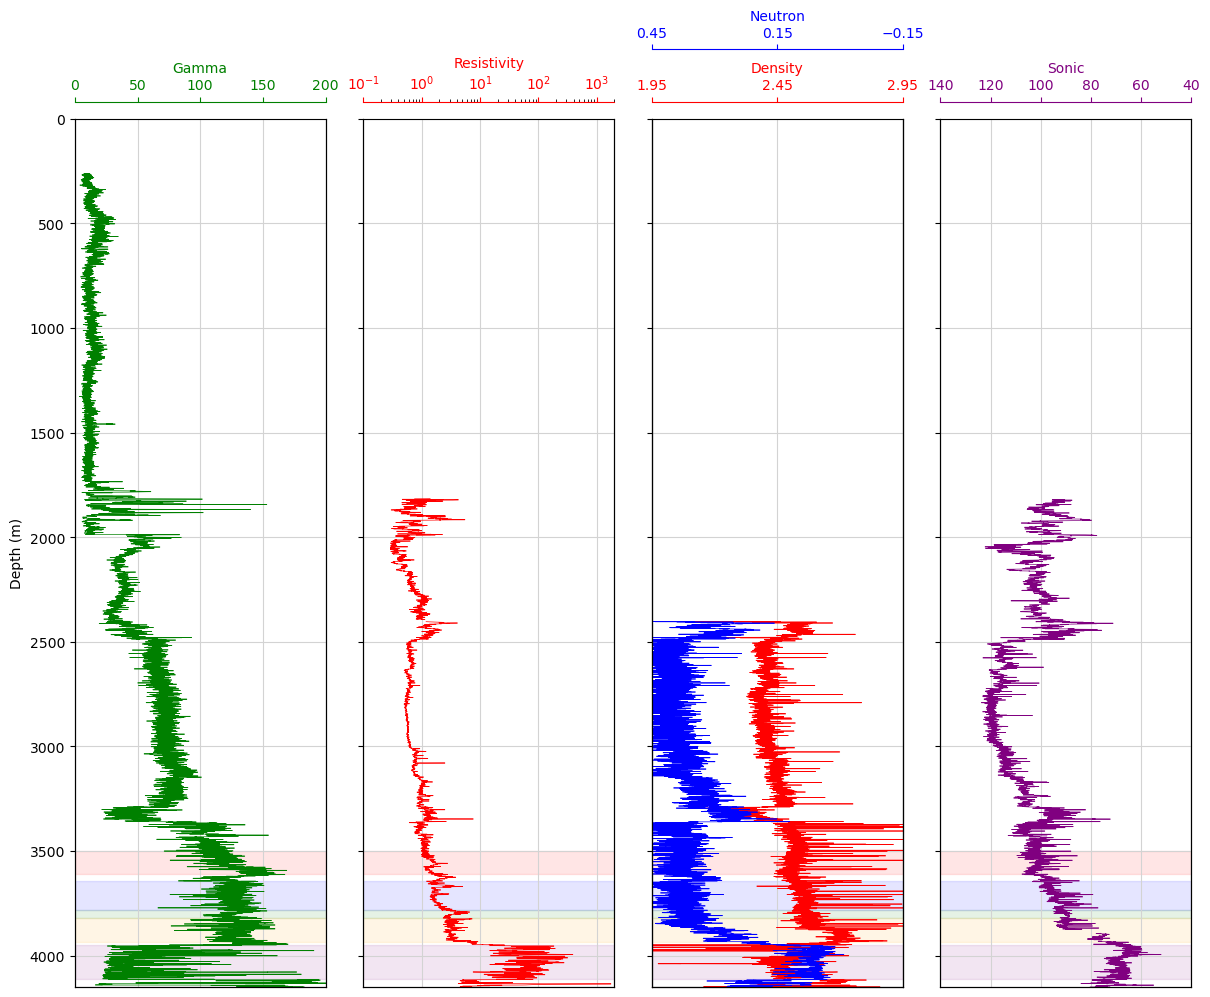

In [21]:
# Create a dictionary of formations with a top and bottom depth
formations = {"A":[3500, 3610], 
              "B": [3643, 3783],
              "C": [3783, 3820],
              "D": [3820, 3935],
              "E": [3947, 4112]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]

fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RESD", "DEPTH", data = df, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = df, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = df, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("TNPH", "DEPTH", data = df, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])


# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(4150, 0)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)


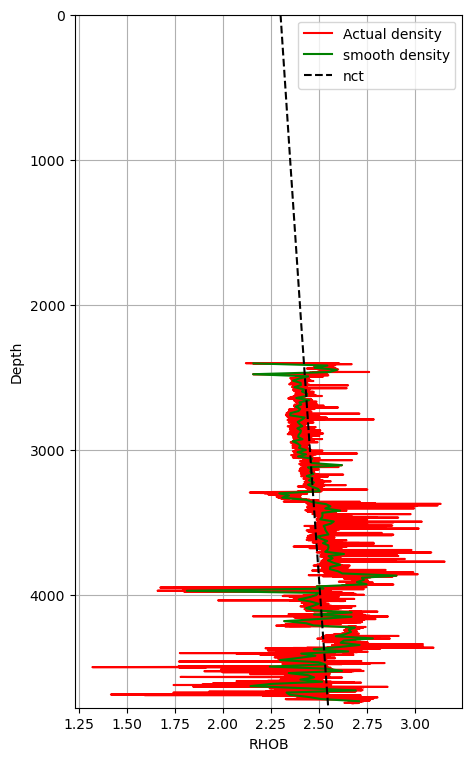

In [8]:
# normal compaction line for density
rho0=2.3
beta = ((1/df.DEPTH)*(np.log(rho0)-np.log(df.RHOB))).mean()
nct_den=rho0*np.exp(-beta*df.DEPTH)

plt.figure(figsize=(5,9))
plt.plot(df["RHOB"],df["DEPTH"],label='Actual density',color='red')
plt.plot(resampled_df['RHOB'], resampled_df['DEPTH'],label='smooth density',color='green')
plt.plot(nct_den, df['DEPTH'],label='nct',color='k',linestyle='--')
plt.ylim(max(resampled_df['DEPTH']), min(resampled_df['DEPTH']))
plt.xlabel('RHOB')
plt.ylabel('Depth')
plt.grid()
plt.legend()


In [9]:
df2= pd.read_excel(r"C:\Users\RAJKUMAR MONDAL\Downloads\Checkshot_data_Gorgonichthys-1.xlsx")

df2.head()

Vertical_Depth  Measured Depth  Observed Travel Time(owt)  \
0             0.0            23.7                        NaN   
1           266.4           290.0                     0.1663   
2           316.3           339.9                     0.1856   
3           366.3           389.9                     0.2059   
4           416.4           440.0                     0.2262   

   Vertical_Transit_Time(owt)  Vertical_Transit_Time  
0                      0.0000                 0.0000  
1                      0.1705                 0.3410  
2                      0.1903                 0.3806  
3                      0.2109                 0.4218  
4                      0.2314                 0.4628

In [10]:
df3=df[(df['DEPTH']>=2500) & (df["DEPTH"]<=4800)]
df4=df[(df["DEPTH"]>=500) & (df["DEPTH"]<=4800)]


In [25]:
def hydro(rhow,g,z):
    dz = np.concatenate([np.array([np.diff(z).mean()]),np.diff(z)])
    return np.cumsum(145*rhow*g*10**(-3)*dz)
Phydro=hydro(1,10,df['DEPTH'])




def water_col(row1, g1, z1):
    if np.isscalar(z1):
        z1 = np.array([z1])  # Convert scalar to array
    dz1 = np.concatenate([np.array([np.diff(z1).mean()]), np.diff(z1)])
    return np.cumsum(145 * row1 * g1 * 10**(-3) * dz1)

Pw = water_col(1, 10, 500)

 
df4=df[(df["DEPTH"]>=500) & (df["DEPTH"]<=4800)]
 
def litho(rhob,g2,z2):
   dz2 = np.concatenate([np.array([np.diff(z2).mean()]),np.diff(z2)])
   return np.cumsum(145*rhob*g2*10**(-3)*dz2)
Plitho=litho(2.3,10,df['DEPTH'])
   
   




C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\2895639521.py:12: RuntimeWarning: Mean of empty slice.
  dz1 = np.concatenate([np.array([np.diff(z1).mean()]), np.diff(z1)])
c:\Users\RAJKUMAR MONDAL\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


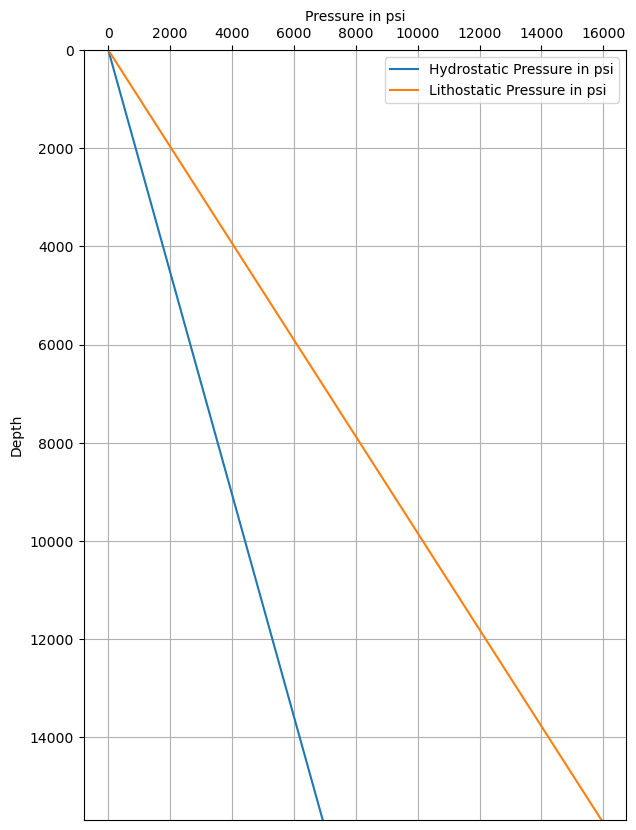

In [26]:
plt.figure(figsize=(7,10))
plt.plot(Phydro,df["DEPTH"]/.3048,label='Hydrostatic Pressure in psi')
plt.plot(Plitho,df["DEPTH"]/.3048,label='Lithostatic Pressure in psi')
plt.ylim(max(df['DEPTH']/.3048), min(df['DEPTH']/.3048))
plt.xlabel('Pressure in psi')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position("top")
plt.ylabel('Depth')
plt.grid()
plt.legend()


In [27]:
# def den(pb,pma,pf):
#     return ((pma-pb)/(pma-pf))
# den_por=den(df['RHOB'],2.65,1.03)

# def den1(pb1,pma1,pf1):
#     return ((pma1-pb1)/(pma1-pf1))
# shale_por=den1(df['RHOB'],2.56,1.03)


df['Sv'] = Plitho
df['Phydro'] = Phydro

df['RHOB_filt']=df['RHOB'].rolling(50).median()
df['GR_filt'] = df['GR'].rolling(50).median()
df['DT_filt'] = df['DT'].rolling(50).median()
df['TNPH_filt'] = df['TNPH'].rolling(50).median()
df['RESD_filt'] = df['RESD'].rolling(50).median()


df_sort = df[::10]
df_sort


DEPTH   BS  CALI  DENS  DENSC  DRHO  DT  DTCO  DTSH  DTSM  ...  \
0         0.000  NaN   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
10        1.524  NaN   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
20        3.048  NaN   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
30        4.572  NaN   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
40        6.096  NaN   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
...         ...  ...   ...   ...    ...   ...  ..   ...   ...   ...  ...   
31320  4773.168  8.5   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
31330  4774.692  8.5   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
31340  4776.216  8.5   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
31350  4777.740  8.5   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   
31360  4779.264  8.5   NaN   NaN    NaN   NaN NaN   NaN   NaN   NaN  ...   

       TNPH   U  VPVS            Sv      Phydro  RHOB_filt  GR_filt  DT_filt  \
0       NaN NaN   NaN      0.508254     0.22098        NaN      NaN      NaN   
10      NaN NaN   NaN      5.590794     2.43078        NaN      NaN      NaN   
20      NaN NaN   NaN     10.673334     4.64058        NaN      NaN      NaN   
30      NaN NaN   NaN     15.755874     6.85038        NaN      NaN      NaN   
40      NaN NaN   NaN     20.838414     9.06018        NaN      NaN      NaN   
...     ...  ..   ...           ...         ...        ...      ...      ...   
31320   NaN NaN   NaN  15919.023534  6921.31458        NaN      NaN      NaN   
31330   NaN NaN   NaN  15924.106074  6923.52438        NaN      NaN      NaN   
31340   NaN NaN   NaN  15929.188614  6925.73418        NaN      NaN      NaN   
31350   NaN NaN   NaN  15934.271154  6927.94398        NaN      NaN      NaN   
31360   NaN NaN   NaN  15939.353694  6930.15378        NaN      NaN      NaN   

       TNPH_filt  RESD_filt  
0            NaN        NaN  
10           NaN        NaN  
20           NaN        NaN  
30           NaN        NaN  
40           NaN        NaN  
...          ...        ...  
31320        NaN        NaN  
31330        NaN        NaN  
31340        NaN        NaN  
31350        NaN        NaN  
31360        NaN        NaN  

[3137 rows x 30 columns]

In [89]:

GR_filt = np.array(df_sort['GR_filt'])
shale = df_sort.loc[GR_filt >= 50]
sand = df_sort.loc[GR_filt < 50]
cutoff = shale.GR_filt.mean()
cutoff

df_fil=df_sort[(df_sort['GR_filt']>=cutoff)]
df_fil

DEPTH     BS     CALI    DENS    DENSC     DRHO        DT      DTCO  \
22120  3371.088  12.25  12.1227  2.5015  0.05354  0.05354  106.4876  106.4876   
22130  3372.612  12.25  12.1453  2.4894  0.04814  0.04814  106.3480  106.3480   
22140  3374.136  12.25  12.1227  2.4649  0.01989  0.01989   94.5894   94.5894   
22150  3375.660  12.25  12.1679  2.8528  0.04397  0.04397   99.5772   99.5772   
22160  3377.184  12.25  12.1453  2.4882  0.03281  0.03281  106.8104  106.8104   
...         ...    ...      ...     ...      ...      ...       ...       ...   
31060  4733.544   8.50   8.4579  2.7224  0.00233  0.00233   77.8684   77.8684   
31070  4735.068   8.50   8.5322  2.6974  0.00220  0.00220   77.2541   77.2541   
31080  4736.592   8.50   8.4937  2.6646  0.01072  0.01072   80.4448   80.4448   
31090  4738.116   8.50   8.5026  2.6915  0.03713  0.03713   82.0422   82.0422   
31100  4739.640   8.50   8.5145  2.6846 -0.00399 -0.00399   80.0609   80.0609   

           DTSH      DTSM  ...     TNPH        U    VPVS            Sv  \
22120  254.2244  254.2244  ...  0.36649   9.8916     NaN  11243.086734   
22130  250.3074  250.3074  ...  0.44998  10.7240     NaN  11248.169274   
22140  242.7189  242.7189  ...  0.40798  10.3064     NaN  11253.251814   
22150  214.1093  214.1093  ...  0.34220  16.5397     NaN  11258.334354   
22160  254.9910  254.9910  ...  0.38331  10.2476     NaN  11263.416894   
...         ...       ...  ...      ...      ...     ...           ...   
31060  148.8723  148.8723  ...  0.28990   9.7697  1.9126  15786.877494   
31070  157.9570  157.9570  ...  0.26598   9.8371  2.0500  15791.960034   
31080  167.6871  167.6871  ...  0.27700  11.8896  2.0861  15797.042574   
31090  167.4373  167.4373  ...  0.30833  10.0215  2.0341  15802.125114   
31100  153.2509  153.2509  ...  0.29695  10.3382  1.9116  15807.207654   

           Phydro  RHOB_filt    GR_filt    DT_filt  TNPH_filt  RESD_filt  
22120  4888.29858    2.51470  106.58605  103.66285   0.409610    0.91160  
22130  4890.50838    2.49230  107.85800  104.87745   0.412365    0.93770  
22140  4892.71818    2.48940  107.45835  104.32065   0.415445    0.93965  
22150  4894.92798    2.48940  107.19600  105.08440   0.404805    0.95075  
22160  4897.13778    2.49075  106.53745  106.22985   0.404805    0.92540  
...           ...        ...        ...        ...        ...        ...  
31060  6863.85978    2.71500  166.83930   75.79440   0.259945    6.85510  
31070  6866.06958    2.71685  168.78520   75.65320   0.261125    6.73005  
31080  6868.27938    2.71170  171.23245   75.88965   0.264280    6.44260  
31090  6870.48918    2.70915  179.39440   77.05085   0.274750    6.14810  
31100  6872.69898    2.70035  182.18030   78.19375   0.287190    5.28710  

[615 rows x 30 columns]

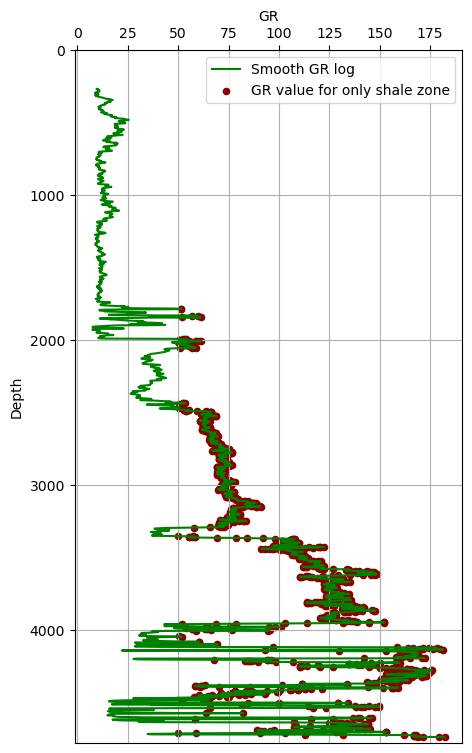

In [131]:
plt.figure(figsize=(5,9))
plt.plot(df_sort['GR_filt'],df_sort['DEPTH'],label="Smooth GR log",color="green")
plt.scatter(shale['GR_filt'],shale["DEPTH"],label="GR value for only shale zone",color="darkred",s=20)
#plt.plot(df_sort['GR_filt'],df_sort['DEPTH'],label="Smooth GR log",color="green")
plt.ylim(max(df_sort['DEPTH']),min(df_sort['DEPTH']))
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.set_ticks_position("top")
plt.xlabel("GR")
plt.ylabel("Depth")
plt.grid()
plt.legend()
plt.savefig("p14.png",dpi=400)

In [93]:
# def cons(phai0,phai,depth):
#     return (np.log(phai0)-np.log(phai))/depth

# beta=cons(.40,den_por,df_fil['DEPTH']).mean()
beta=0.0007240833695897205

In [91]:
df_fil

DEPTH     BS     CALI    DENS    DENSC     DRHO        DT      DTCO  \
22120  3371.088  12.25  12.1227  2.5015  0.05354  0.05354  106.4876  106.4876   
22130  3372.612  12.25  12.1453  2.4894  0.04814  0.04814  106.3480  106.3480   
22140  3374.136  12.25  12.1227  2.4649  0.01989  0.01989   94.5894   94.5894   
22150  3375.660  12.25  12.1679  2.8528  0.04397  0.04397   99.5772   99.5772   
22160  3377.184  12.25  12.1453  2.4882  0.03281  0.03281  106.8104  106.8104   
...         ...    ...      ...     ...      ...      ...       ...       ...   
31060  4733.544   8.50   8.4579  2.7224  0.00233  0.00233   77.8684   77.8684   
31070  4735.068   8.50   8.5322  2.6974  0.00220  0.00220   77.2541   77.2541   
31080  4736.592   8.50   8.4937  2.6646  0.01072  0.01072   80.4448   80.4448   
31090  4738.116   8.50   8.5026  2.6915  0.03713  0.03713   82.0422   82.0422   
31100  4739.640   8.50   8.5145  2.6846 -0.00399 -0.00399   80.0609   80.0609   

           DTSH      DTSM  ...     TNPH        U    VPVS            Sv  \
22120  254.2244  254.2244  ...  0.36649   9.8916     NaN  11243.086734   
22130  250.3074  250.3074  ...  0.44998  10.7240     NaN  11248.169274   
22140  242.7189  242.7189  ...  0.40798  10.3064     NaN  11253.251814   
22150  214.1093  214.1093  ...  0.34220  16.5397     NaN  11258.334354   
22160  254.9910  254.9910  ...  0.38331  10.2476     NaN  11263.416894   
...         ...       ...  ...      ...      ...     ...           ...   
31060  148.8723  148.8723  ...  0.28990   9.7697  1.9126  15786.877494   
31070  157.9570  157.9570  ...  0.26598   9.8371  2.0500  15791.960034   
31080  167.6871  167.6871  ...  0.27700  11.8896  2.0861  15797.042574   
31090  167.4373  167.4373  ...  0.30833  10.0215  2.0341  15802.125114   
31100  153.2509  153.2509  ...  0.29695  10.3382  1.9116  15807.207654   

           Phydro  RHOB_filt    GR_filt    DT_filt  TNPH_filt  RESD_filt  
22120  4888.29858    2.51470  106.58605  103.66285   0.409610    0.91160  
22130  4890.50838    2.49230  107.85800  104.87745   0.412365    0.93770  
22140  4892.71818    2.48940  107.45835  104.32065   0.415445    0.93965  
22150  4894.92798    2.48940  107.19600  105.08440   0.404805    0.95075  
22160  4897.13778    2.49075  106.53745  106.22985   0.404805    0.92540  
...           ...        ...        ...        ...        ...        ...  
31060  6863.85978    2.71500  166.83930   75.79440   0.259945    6.85510  
31070  6866.06958    2.71685  168.78520   75.65320   0.261125    6.73005  
31080  6868.27938    2.71170  171.23245   75.88965   0.264280    6.44260  
31090  6870.48918    2.70915  179.39440   77.05085   0.274750    6.14810  
31100  6872.69898    2.70035  182.18030   78.19375   0.287190    5.28710  

[615 rows x 30 columns]

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\3802729825.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shale['Porosity'] = np.where(shale_por >=0, shale_por,0)


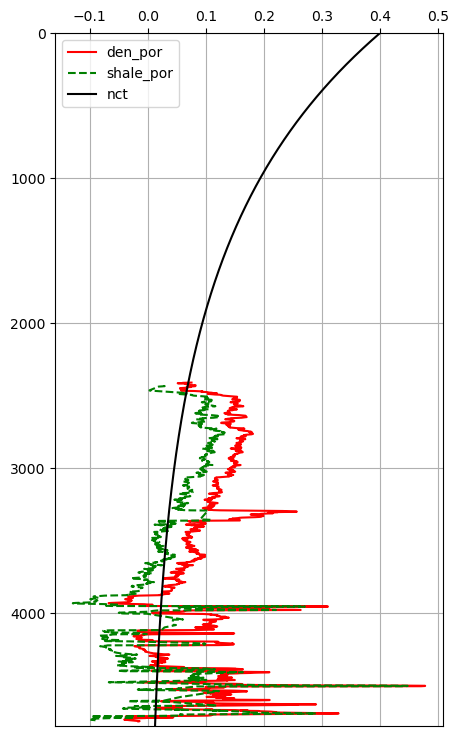

In [98]:
def den(pb,pma,pf):
    return ((pma-pb)/(pma-pf))
den_por=den(df_sort['RHOB_filt'],2.65,1)

def den1(pb1,pma1,pf1):
    return ((pma1-pb1)/(pma1-pf1))
shale_por=den1(shale['RHOB_filt'],2.56,1)

def sa(pb,pma,pf):
    return ((pma-pb)/(pma-pf))
sand_por=den(sand['RHOB_filt'],2.65,1)
shale['Porosity'] = np.where(shale_por >=0, shale_por,0)

plt.figure(figsize=(5,9))
plt.plot(den_por,df_sort.DEPTH,label='den_por',color='red')
plt.plot(shale_por,shale.DEPTH,label='shale_por',linestyle='--',color='green')
#plt.plot(sand_por,sand.DEPTH,label='sand_por',linestyle='-.')
plt.plot(nct,df_sort.DEPTH,label='nct',color='black')
plt.legend()
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.set_ticks_position("top")
plt.ylim(max(df_sort['DEPTH']), min(df_sort['DEPTH']))
plt.grid()
plt.savefig("p11.png",dpi=400)








c:\Users\RAJKUMAR MONDAL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\1656628097.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)


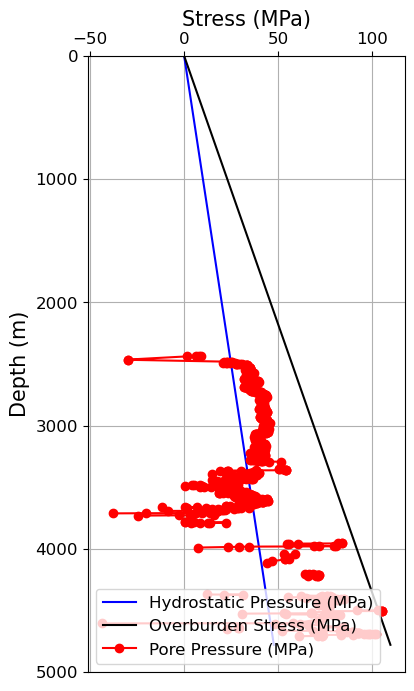

In [105]:
shale_new=shale.dropna()

factor1 = (np.log(phi_0) - np.log(shale.Porosity))/(beta*shale.DEPTH)
Pp1 = shale.Sv - ((shale.Sv - shale.Phydro)*factor1)
fig,ax=plt.subplots(figsize=(9,8))

ax = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
ax.plot(df_sort.Phydro/145,df_sort.DEPTH, color = 'blue',label = 'Hydrostatic Pressure (MPa)')
ax.plot(df_sort.Sv/145,df_sort.DEPTH, color = 'black',label = 'Overburden Stress (MPa)')

ax.plot(Pp1/145,shale.DEPTH,'-o', color = 'red', label= 'Pore Pressure (MPa)')

ax.set_ylim(5000,0)


ax.set_xlabel('Stress (MPa)',fontsize=15)
ax.set_ylabel('Depth (m)',fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.legend(fontsize=12)
ax.grid()

plt.savefig('p12.png',dpi=400)







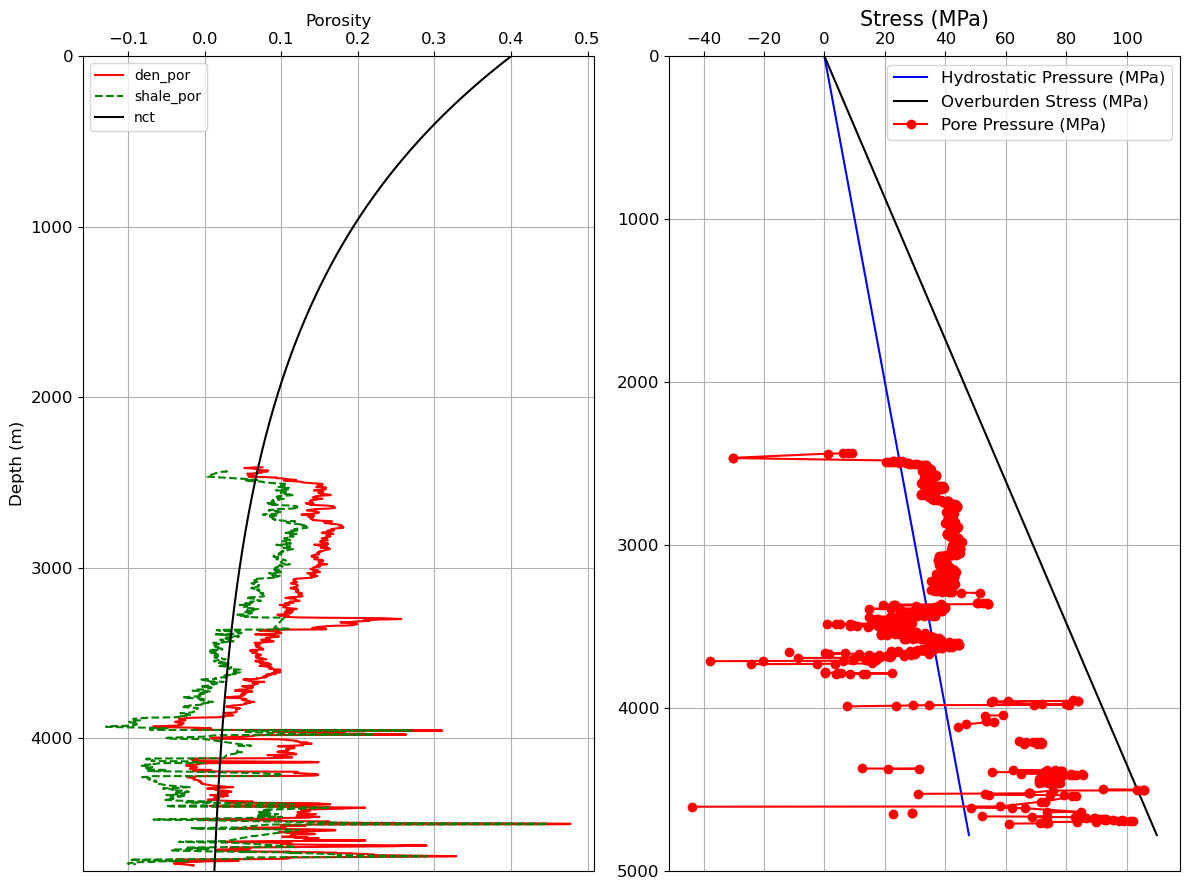

In [107]:
import matplotlib.pyplot as plt

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))

# Plotting on the first axis (ax1) - Porosity vs Depth
ax1.plot(den_por, df_sort.DEPTH, label='den_por', color='red')
ax1.plot(shale_por, shale.DEPTH, label='shale_por', linestyle='--', color='green')
# ax1.plot(sand_por, sand.DEPTH, label='sand_por', linestyle='-.')
ax1.plot(nct, df_sort.DEPTH, label='nct', color='black')
ax1.legend()
ax1.set_xlabel('Porosity', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position("top")
ax1.set_ylim(max(df_sort['DEPTH']), min(df_sort['DEPTH']))  # Inverted y-axis
ax1.grid()

# Plotting on the second axis (ax2) - Stress and Pressure vs Depth
ax2.plot(df_sort.Phydro/145, df_sort.DEPTH, color='blue', label='Hydrostatic Pressure (MPa)')
ax2.plot(df_sort.Sv/145, df_sort.DEPTH, color='black', label='Overburden Stress (MPa)')
ax2.plot(Pp1/145, shale.DEPTH, '-o', color='red', label='Pore Pressure (MPa)')

ax2.set_xlabel('Stress (MPa)', fontsize=15)
ax2.tick_params(axis='both', labelsize=12)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.set_ylim(5000, 0)  # Inverted y-axis
ax2.legend(fontsize=12)
ax2.grid()

# Adjust the layout and show the plots
plt.tight_layout()
plt.savefig("p13.png",dpi=400)


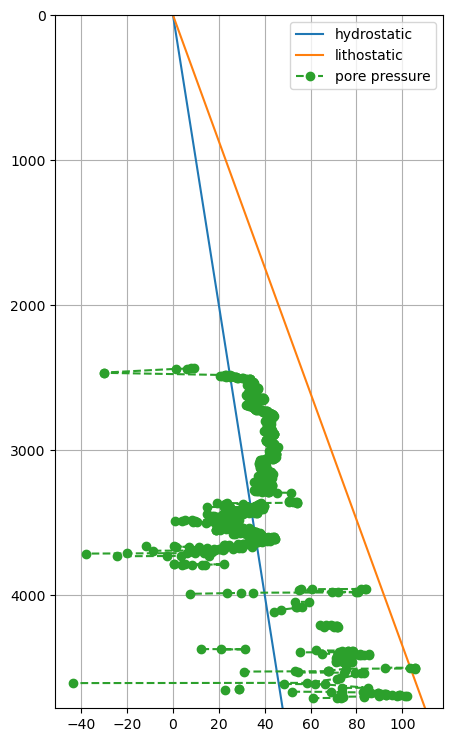

In [23]:
plt.figure(figsize=(5,9))
plt.plot(df_sort.Phydro/145,df_sort.DEPTH,label="hydrostatic")
plt.plot(df_sort.Sv/145,df_sort.DEPTH,label="lithostatic")
plt.plot(Pp1/145,shale.DEPTH,label="pore pressure",linestyle='--',marker='o')
plt.ylim(max(df_sort['DEPTH']), min(df_sort['DEPTH']))
plt.legend()
plt.grid()


C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_20924\3190745143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shale.dropna(inplace=True)


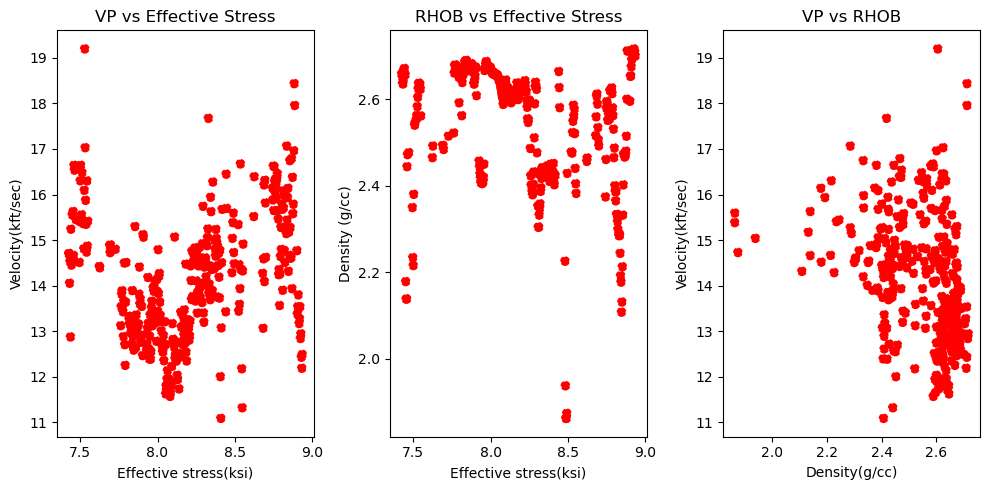

In [198]:
shale.dropna(inplace=True)
#shale.info()
effective_stress=shale.Sv-shale.Phydro ## it is in psi
vp=(10**3)/shale.DT  ## it is in kft/sec
plt.figure(figsize=(10,5))

# First subplot
plt.subplot(131)
plt.scatter((effective_stress)*0.001, vp, linestyle="--", color='red')
plt.ylabel("Velocity(kft/sec)")
plt.xlabel("Effective stress(ksi)")
plt.title("VP vs Effective Stress")

# Second subplot
plt.subplot(132)
plt.scatter((effective_stress)*0.001, shale.RHOB_filt, linestyle="--", color='red')
plt.ylabel("Density (g/cc)")
plt.xlabel("Effective stress(ksi)")
plt.title("RHOB vs Effective Stress")

# Third subplot
plt.subplot(133)
plt.scatter(shale.RHOB_filt, vp, linestyle="--", color='red')
plt.xlabel("Density(g/cc)")
plt.ylabel("Velocity(kft/sec)")
plt.title("VP vs RHOB")

plt.tight_layout()
plt.show()


C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_20924\2289340481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shale.dropna(inplace=True)


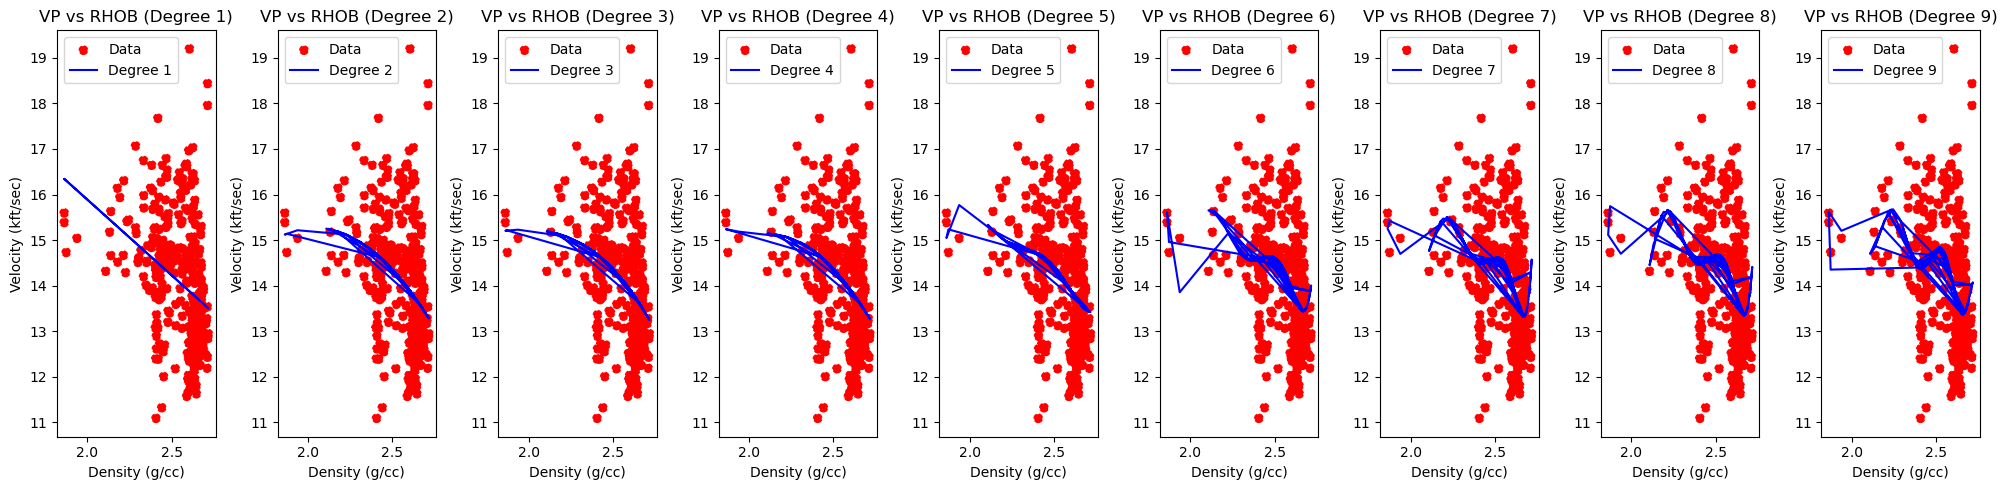

Best fit obtained with polynomial degree: 9
R-squared value for the best fit: 0.1858635353291349


In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Drop NaN values
shale.dropna(inplace=True)

# Calculate effective stress and velocity
effective_stress = shale.Sv - shale.Phydro  # in psi
vp = (10**3) / shale.DT  # in kft/sec

# Initialize variables to track best fit
best_degree = None
best_r_squared = -1  # Initialize with a very low value

# Define the range of polynomial degrees to try
degrees = range(1, 10)

# Plotting
plt.figure(figsize=(20, 5))

# Iterate over different polynomial degrees
for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(shale.RHOB_filt.values.reshape(-1, 1))

    # Fit polynomial regression
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_poly, vp)

    # Predict using the model
    vp_pred = polynomial_regressor.predict(X_poly)

    # Calculate R-squared value
    r_squared = r2_score(vp, vp_pred)

    # Update best fit if necessary
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_degree = degree

    # Plot VP vs RHOB with polynomial fit
    plt.subplot(1, len(degrees), i)
    plt.scatter(shale.RHOB_filt, vp, linestyle="--", color='red', label="Data")
    plt.plot(shale.RHOB_filt, vp_pred, color='blue', label="Degree {}".format(degree))
    plt.xlabel("Density (g/cc)")
    plt.ylabel("Velocity (kft/sec)")
    plt.title("VP vs RHOB (Degree {})".format(degree))
    plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print("Best fit obtained with polynomial degree:", best_degree)
print("R-squared value for the best fit:", best_r_squared)


C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_20924\153181420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shale.dropna(inplace=True)


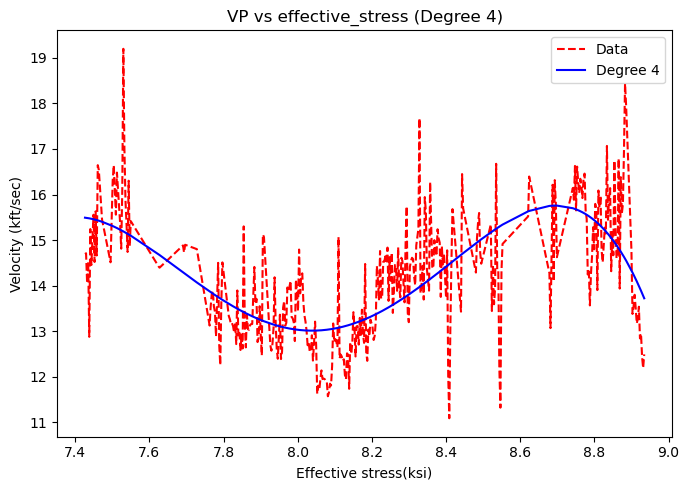

Polynomial degree: 4
R-squared value: 0.4610418595238177


In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Drop NaN values
shale.dropna(inplace=True)

# Calculate effective stress and velocity
effective_stress = shale.Sv - shale.Phydro  # in psi
vp = (10**3) / shale.DT  # in kft/sec

# Set the fixed degree for polynomial regression
fixed_degree = 4

# Plotting
plt.figure(figsize=(7, 5))

# Create polynomial features
poly_reg = PolynomialFeatures(degree=fixed_degree)
X_poly = poly_reg.fit_transform((effective_stress*0.001).values.reshape(-1, 1))

# Fit polynomial regression
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_poly, vp)

# Predict using the model
vp_pred = polynomial_regressor.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(vp, vp_pred)

# Plot VP vs RHOB with polynomial fit
plt.plot(effective_stress*0.001, vp, linestyle="--", color='red', label="Data")
plt.plot(effective_stress*0.001, vp_pred, color='blue', label="Degree {}".format(fixed_degree))
plt.xlabel("Effective stress(ksi)")
plt.ylabel("Velocity (kft/sec)")
plt.title("VP vs effective_stress (Degree {})".format(fixed_degree))
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print("Polynomial degree:", fixed_degree)
print("R-squared value:", r_squared)


In [187]:
# from sklearn.linear_model import LinearRegression
# x1=shale.RHOB_filt.values
# y1=vp.values
# X1=x1.reshape(-1,1)
# Y1=y1.reshape(-1,1)
# Y1

In [188]:
# model1=LinearRegression()
# model1.fit(X1,Y1)

In [189]:
# r2=model1.score(X1,Y1)
# r2

In [190]:
# x_plot_val=np.arange(0,2.6,.0000025)
# x_plot_values=x_plot_val.reshape(-1,1)
# y_pred=model1.predict(x_plot_values)
# plt.scatter(shale.RHOB_filt,vp,label='plot')
# plt.plot(x_plot_values,y_pred,label='trend')
# plt.legend()

In [24]:
import statsmodels.api as sm

x = np.log(den_por)
#x = sm.add_constant(x)
y = df_sort.DEPTH

c:\Users\RAJKUMAR MONDAL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
x

0       NaN
10      NaN
20      NaN
30      NaN
40      NaN
         ..
31320   NaN
31330   NaN
31340   NaN
31350   NaN
31360   NaN
Name: RHOB_filt, Length: 3137, dtype: float64

In [26]:
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  DEPTH   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.588e+04
Date:                Wed, 06 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:21:07   Log-Likelihood:                         -11649.
No. Observations:                1396   AIC:                                  2.330e+04
Df Residuals:                    1395   BIC:                                  2.331e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RHOB_filt  -1381.0564     10.960   -126.006      0.000   -1402.557   -1359.556
==============================================================================
Omnibus:                      245.300   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1692.389
Skew:                          -0.626   Prob(JB):                         0.00
Kurtosis:                       8.247   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
slope=results.params[0]
slope


-1381.056439076372

In [28]:
beta=-(1/slope)
beta

0.0007240833695897205

c:\Users\RAJKUMAR MONDAL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


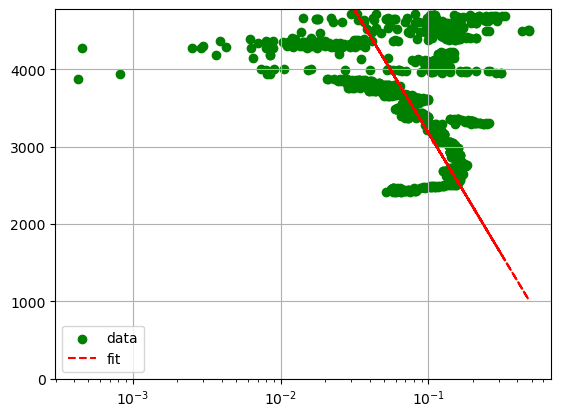

In [29]:
plt.scatter(x=den_por,y=df_sort['DEPTH'],label='data',marker='o',color='green')
plt.plot(den_por,(results.params[0]*np.log(den_por)),label='fit',linestyle='--',color='r')
plt.xscale('log')
plt.legend()
plt.ylim(min(df_sort['DEPTH']), max(df_sort['DEPTH']))
plt.grid()

In [30]:
lithology_numbers = {262.974288: {'lith':'SB', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 696.1582745: {'lith':'TOLIV', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 1089.572078: {'lith':'TGRB', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 1489.536656: {'lith':'TBSS', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 1963.18086: {'lith':'TFEN', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 2415.510315: {'lith':'IFEN', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 3266.709602: {'lith':'KAPTS', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 3618.384712: {'lith':'KBAR', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 3928.329044: {'lith':'TUBS', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 4090.488805: {'lith':'BLBS', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 4243.200000: {'lith':'JOXF', 'lith_num':11, 'hatch':'', 'color':'black'},
                 4450.360316: {'lith':'PF13', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [31]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith



lith  lith_num hatch    color
LITHOLOGY                                  
262.974288      SB         1    ..  #ffff00
696.158274   TOLIV         2    -.  #ffe119
1089.572078   TGRB         3    --  #bebebe
1489.536656   TBSS         4        #7cfc00
1963.180860   TFEN         5    -/  #8080ff
2415.510315   IFEN         6     +  #80ffff
3266.709602  KAPTS         7    ..  #80ffff
3618.384712   KBAR         8     x  #7ddfbe
3928.329044   TUBS         9        #ff80ff
4090.488805   BLBS        10    ||  #ff8c00
4243.200000   JOXF        11          black
4450.360316   PF13        12    -|  #ef138a

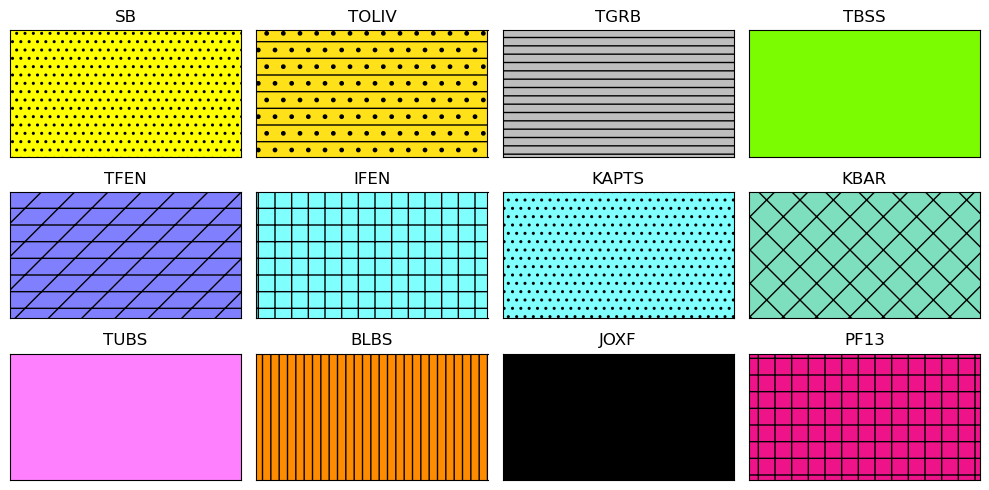

In [32]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

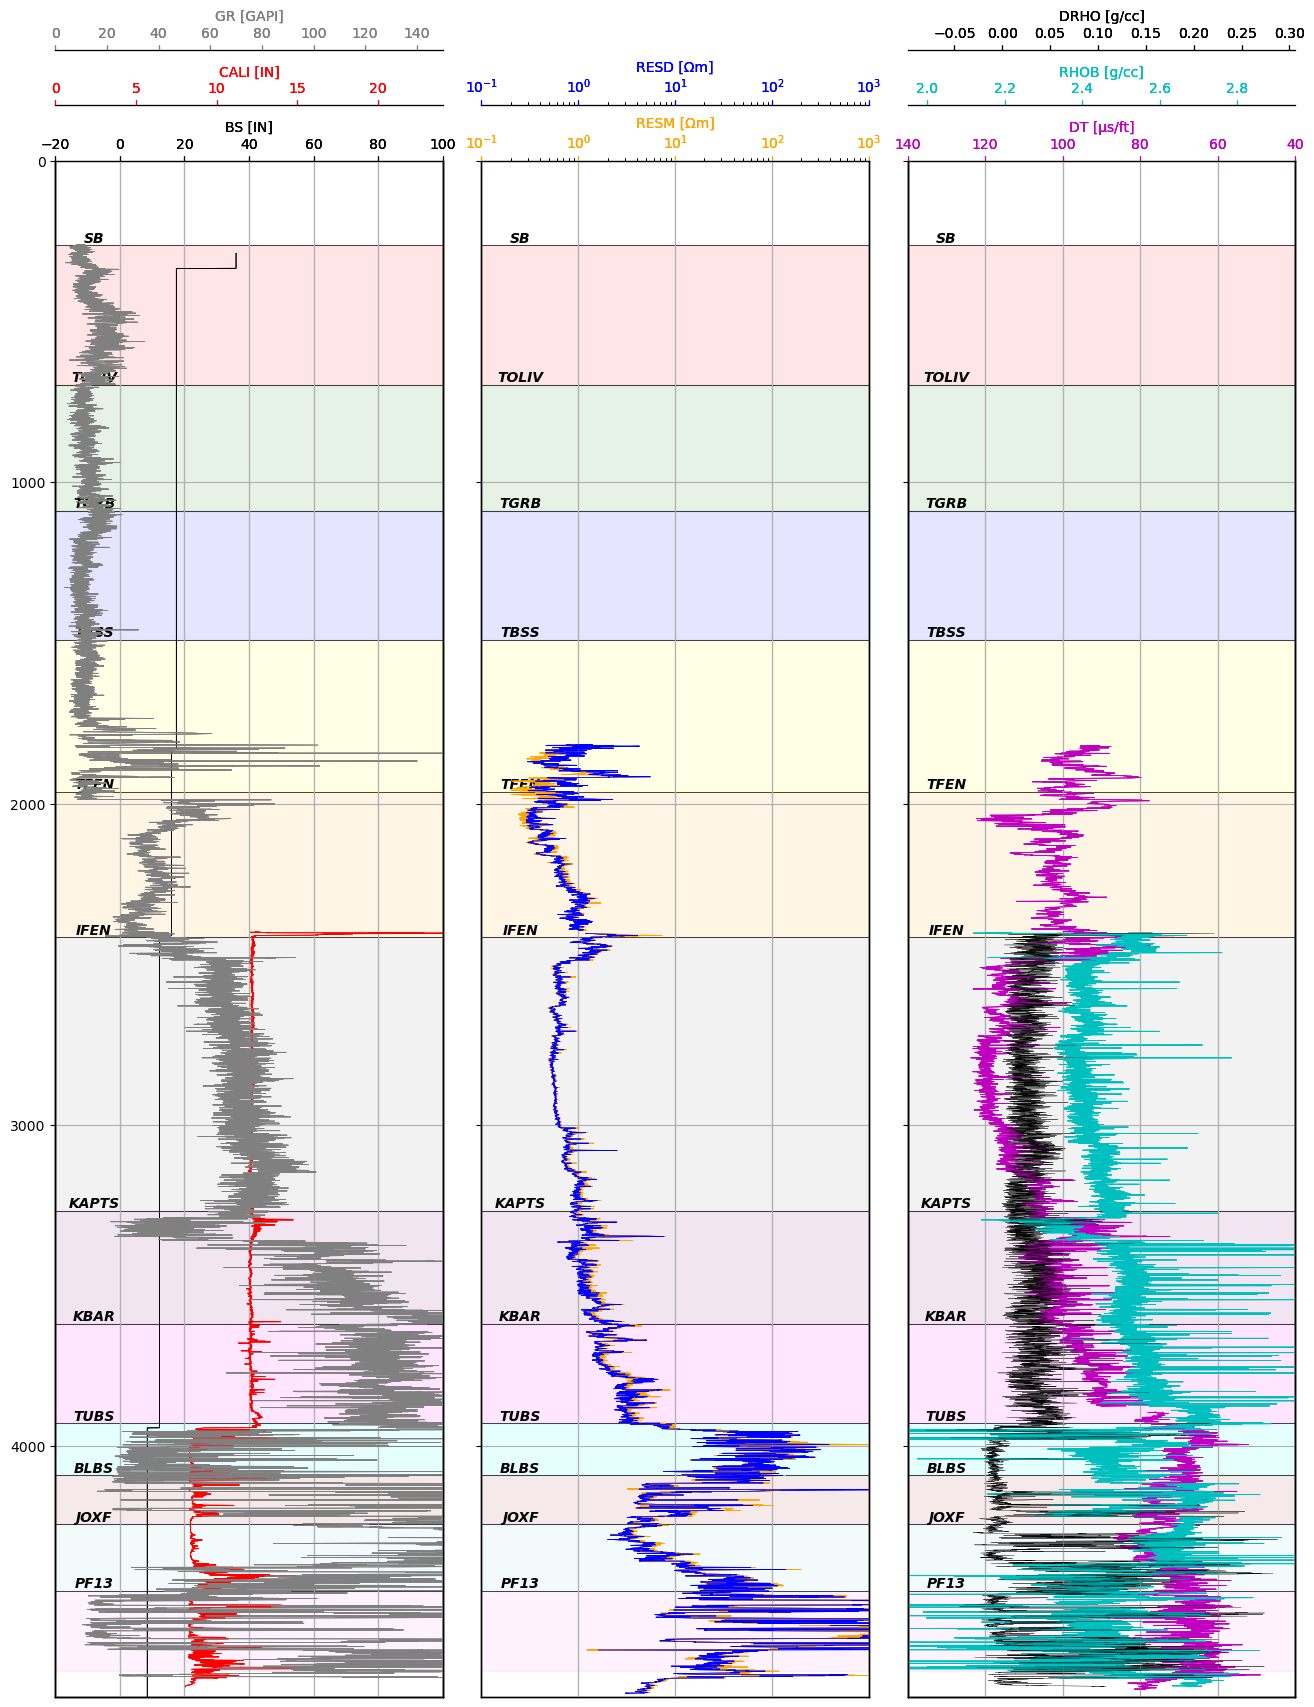

In [23]:



# Marker = ['Barracouta formation','Oliver_formation','Grebe_formation','Bassett_formation','Puffin Formation','Fenelon_formation','lower_Jamieson_formation ','Echuca_Shoals_formation ','TUBS','BLBS','JOXF','lover_formation']
# TVDMSL = [262.974288,696.1582745,1089.572078,1489.536656,1963.18086,2415.510315,3266.709602,3618.384712,3928.329044,4090.488805,4243.2,4450.360316]



# Define the dictionary for Markers
Markers = {
    "Barracouta formation":[262.97 , 500],
    "Oliver Formation": [500.0, 1175.0],
    "Echuca Shoals Formation": [1175.0, 3365.0],
    "Barracouta Formation": [286.8, 500.0],
    "Cartier Formation": [1175.0, 1273.0],
    "Grebe Formation": [1273.0, 1528.0],
    "Bassett Formation": [1528.0, 1818.0],
    "Puffin Formation": [1818.0, 2267.0],
    "Fenelon Formation": [2267.0, 2481.0],
    "Woolaston Formation": [2481.0, 2536.0],
    "Jamieson Formation": [2536.0, 3365.0],
    "Vulcan Formation": [3365.0, 4218.0],
    "Plover Formation": [4218.0, 4718.0],
    "Mount Goodwin Formation": [4718.0, 4767.0]
}

# Define the list of zone colours
zone_colours = [
    'red', 'teal', 'green', 'blue', 'yellow', 'orange', 'grey',
    'purple', 'magenta', 'cyan', 'brown', 'skyblue', 'violet'
]


#plt.rcParams.update(plt.rcParamsDefault)

# call the triple combo function as defined
def triple_combo_log(top_depth,bottom_depth):
    logs=df[(df.DEPTH >= top_depth) & (df.DEPTH <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,24), sharey=True)
    fig.subplots_adjust(top=0.75,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for depth, colour in zip(Markers.values(),zone_colours):
            axes.axhspan(depth[0],depth[1],color = colour,alpha= 0.1)
              
                
#First track GR, CALI, SP logs to display
        ax1 = ax[0].twiny()
        ax1.set_xlim(-20,100)
        ax1.spines['top'].set_position(('outward',0))
        ax1.plot('BS','DEPTH',data = df, color = 'k', lw = 0.5)
        ax1.set_xlabel('BS [IN]',color='k')    
        ax1.tick_params(axis='x', colors='k')
        ax1.grid(True)
        
        ax2 = ax[0].twiny()
        ax2.set_xlim(0,24)
        ax2.spines['top'].set_position(('outward', 40))
        ax2.plot('CALI','DEPTH',data = df, color = 'red', lw = 0.5)
        ax2.set_xlabel('CALI [IN]', color ='red')
        ax2.tick_params(axis='x', colors='red')
        
        ax3 = ax[0].twiny()
        ax3.set_xlim(0,150)
        ax3.spines['top'].set_position(('outward', 80))
        ax3.plot('GR','DEPTH',data = df,color = "grey", lw = 0.5)
        ax3.set_xlabel('GR [GAPI]', color= 'grey')
        ax3.tick_params(axis='x', colors='grey')
        

# Second track resitivity plot
        ax11 = ax[1].twiny()
        ax11.set_xlim(0.1, 1000)
        ax11.set_xscale('log')
        ax11.grid(True)
        ax11.spines['top'].set_position(('outward', 0))
        ax11.plot('RESM','DEPTH',data = df,color = 'orange', lw = 0.5)
        ax11.set_xlabel('RESM [Ωm]', color = 'orange')
        ax11.tick_params(axis='x', colors='orange')
        
        ax12 = ax[1].twiny()
        ax12.set_xlim(0.1, 1000)
        ax12.set_xscale('log')
        ax12.spines['top'].set_position(('outward', 40))
        ax12.plot('RESD','DEPTH',data = df,color = 'blue', lw = 0.5)
        ax12.set_xlabel('RESD [Ωm]', color= 'blue')
        ax12.tick_params(axis='x', colors='blue')

         
# Third track NPHI, RHO, DT display
        ax21 = ax[2].twiny()
        ax21.grid(True)
        ax21.set_xlim(140,40)
        ax21.spines['top'].set_position(('outward', 0))
        ax21.plot('DT','DEPTH',data = df,color = 'm', lw = 0.5)
        ax21.set_xlabel('DT [µs/ft]', color= 'm')
        ax21.tick_params(axis='x', colors= 'm')
        
         
        ax23 = ax[2].twiny()
        ax23.set_xlim(1.95, 2.95)
        ax23.spines['top'].set_position(('outward', 40))
        ax23.plot('RHOB','DEPTH',data = df,color = 'c', lw = 0.5)
        ax23.set_xlabel('RHOB [g/cc]', color = 'c')
        ax23.tick_params(axis='x', colors= 'c')
        
        ax24 = ax[2].twiny()
        ax24.spines['top'].set_position(('outward', 80))
        ax24.plot('DRHO','DEPTH',data = df,color = 'k',ls='-',lw = 0.1)
        ax24.set_xlabel('DRHO [g/cc]', color = 'k')
        ax24.tick_params(axis='x', colors= 'k')
        

        
        for (i,j) in zip(TVDMSL,Marker):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',
                          verticalalignment='bottom',style ='italic',
                            fontsize = 10,fontweight ='bold')
                
        
        

triple_combo_log(df.DEPTH.min(),df.DEPTH.max())
plt.savefig('p3.png', dpi=400)

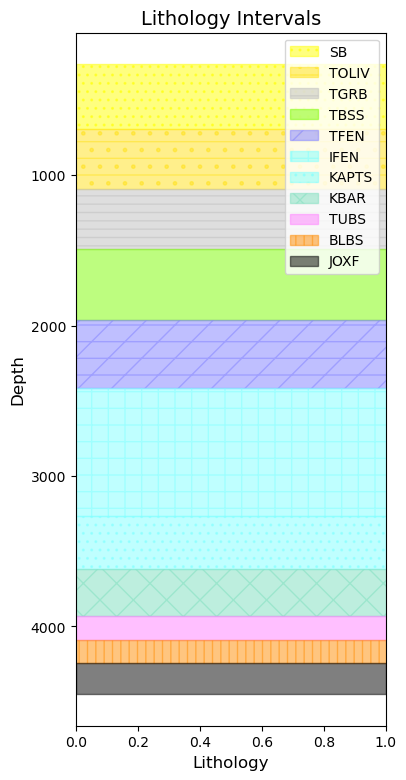

In [73]:
import matplotlib.pyplot as plt

# Assuming 'lithology_numbers' is your provided dictionary
depths = list(lithology_numbers.keys())
lithologies = [lithology_numbers[depth]['lith'] for depth in depths]

# Define brighter color and hatch patterns
color_dict = {
    'SB': '#ffcc00',  # Bright yellow
    'TOLIV': '#ff9900',  # Bright orange
    'TGRB': '#99ccff',  # Light blue
    'TBSS': '#66ff66',  # Bright green
    'TFEN': '#cc99ff',  # Light purple
    'IFEN': '#99ffff',  # Light cyan
    'KAPTS': '#99ffff',  # Light cyan
    'KBAR': '#80ffaa',  # Light green
    'TUBS': '#ff99ff',  # Light magenta
    'BLBS': '#ffaa80',  # Light orange
    'JOXF': '#4d4d4d',  # Dark grey
    'PF13': '#ff6680'   # Pink
}

hatch_dict = {
    'SB': '..',
    'TOLIV': '-.',
    'TGRB': '--',
    'TBSS': '',
    'TFEN': '-/',
    'IFEN': '+',
    'KAPTS': '..',
    'KBAR': 'x',
    'TUBS': '',
    'BLBS': '||',
    'JOXF': '',
    'PF13': '-|'
}

# Plotting
plt.figure(figsize=(4,9))
for i in range(len(depths)-1):
    lith = lithologies[i]
    plt.fill_betweenx(y=[depths[i], depths[i+1]], x1=0, x2=1, color=lithology_numbers[depths[i]]['color'], hatch=hatch_dict[lith], label=lith,alpha=0.50)
plt.xlim(0, 1)
plt.xlabel('Lithology', fontsize=12)
plt.ylabel('Depth', fontsize=12)
plt.title('Lithology Intervals', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.legend()
plt.show()


**Data quality visualization**

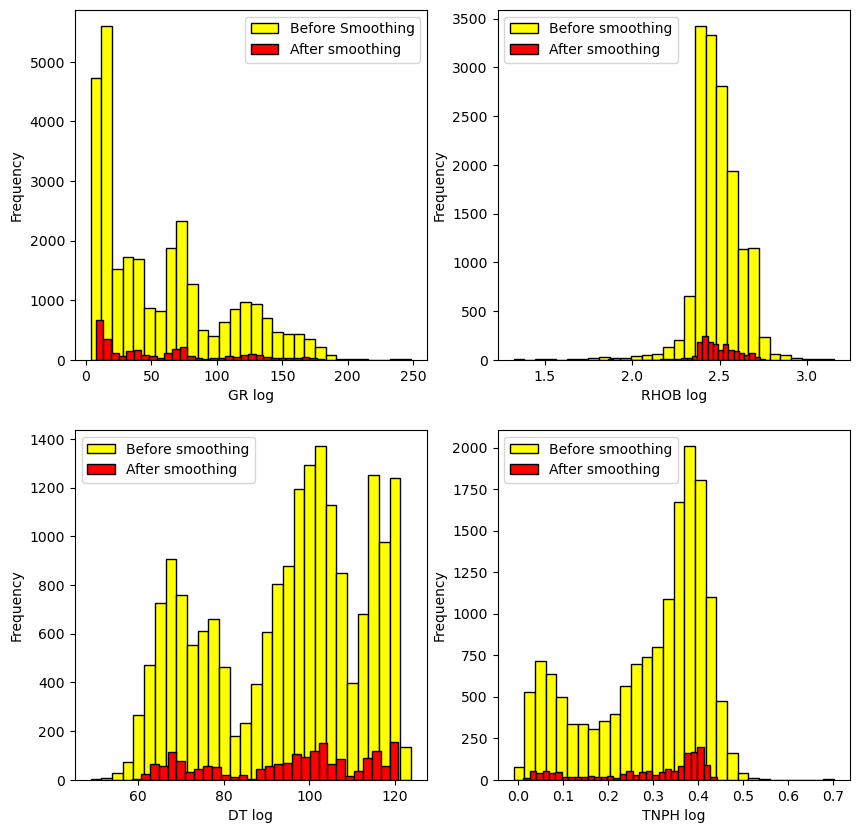

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.hist(df['GR'],bins=30,color='yellow',edgecolor='black',label='Before Smoothing')
plt.hist(df_sort['GR_filt'],bins=30,color='red',edgecolor='black',label='After smoothing')
plt.xlabel("GR log")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(222)
plt.hist(df['RHOB'],bins=30,color='yellow',edgecolor='black',label='Before smoothing')
plt.hist(df_sort['RHOB_filt'],bins=30,color='red',edgecolor='black',label='After smoothing')
plt.xlabel("RHOB log")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(223)
plt.hist(df['DT'],bins=30,color='yellow',edgecolor='black',label='Before smoothing')
plt.hist(df_sort['DT_filt'],bins=30,color='red',edgecolor='black',label='After smoothing')
plt.xlabel("DT log")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(224)
plt.hist(df['TNPH'],bins=30,color='yellow',edgecolor='black',label='Before smoothing')
plt.hist(df_sort['TNPH_filt'],bins=30,color='red',edgecolor='black',label='After smoothing')
plt.xlabel("TNPH log")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("p4.png",dpi=400)

Text(0.5, 0.98, 'Before smoothing')

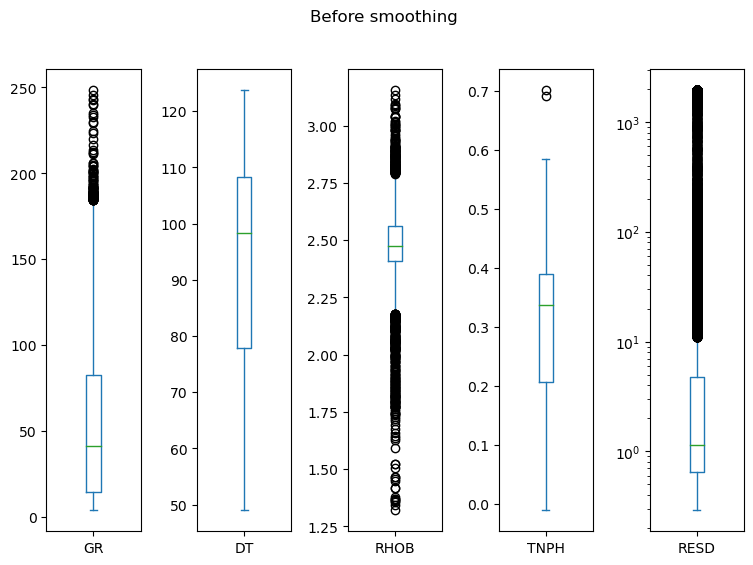

In [31]:
plt.figure(figsize=(9,6))
plt.subplot(151)
plt.subplots_adjust(wspace=.6)
df['GR'].plot(kind="box")

plt.subplot(152)
df['DT'].plot(kind="box")


plt.subplot(153)
df['RHOB'].plot(kind="box")

plt.subplot(154)
df['TNPH'].plot(kind="box")

plt.subplot(155)
df['RESD'].plot(kind="box")
plt.semilogy()

plt.suptitle("Before smoothing")






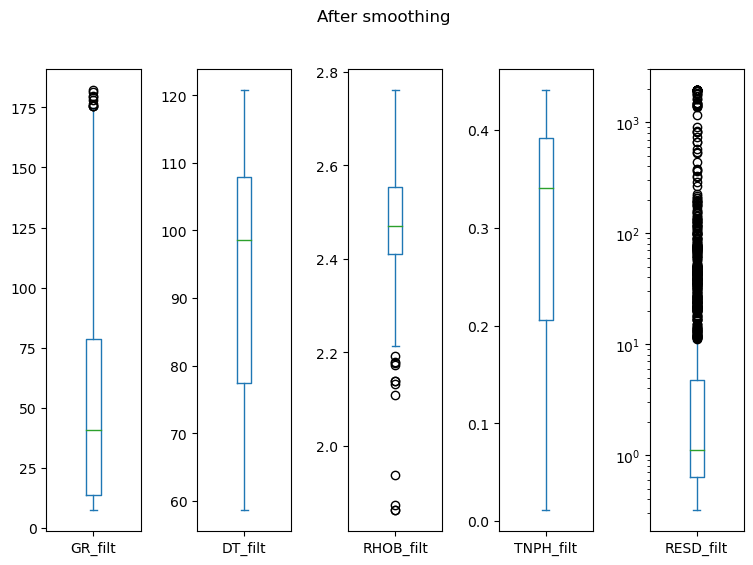

In [32]:
plt.figure(figsize=(9,6))
plt.subplot(151)
plt.subplots_adjust(wspace=.6)
df_sort['GR_filt'].plot(kind="box")

plt.subplot(152)
df_sort['DT_filt'].plot(kind="box")


plt.subplot(153)
df_sort['RHOB_filt'].plot(kind="box")

plt.subplot(154)
df_sort['TNPH_filt'].plot(kind="box")

plt.subplot(155)
df_sort['RESD_filt'].plot(kind="box")
plt.semilogy()

plt.suptitle("After smoothing")
plt.show()

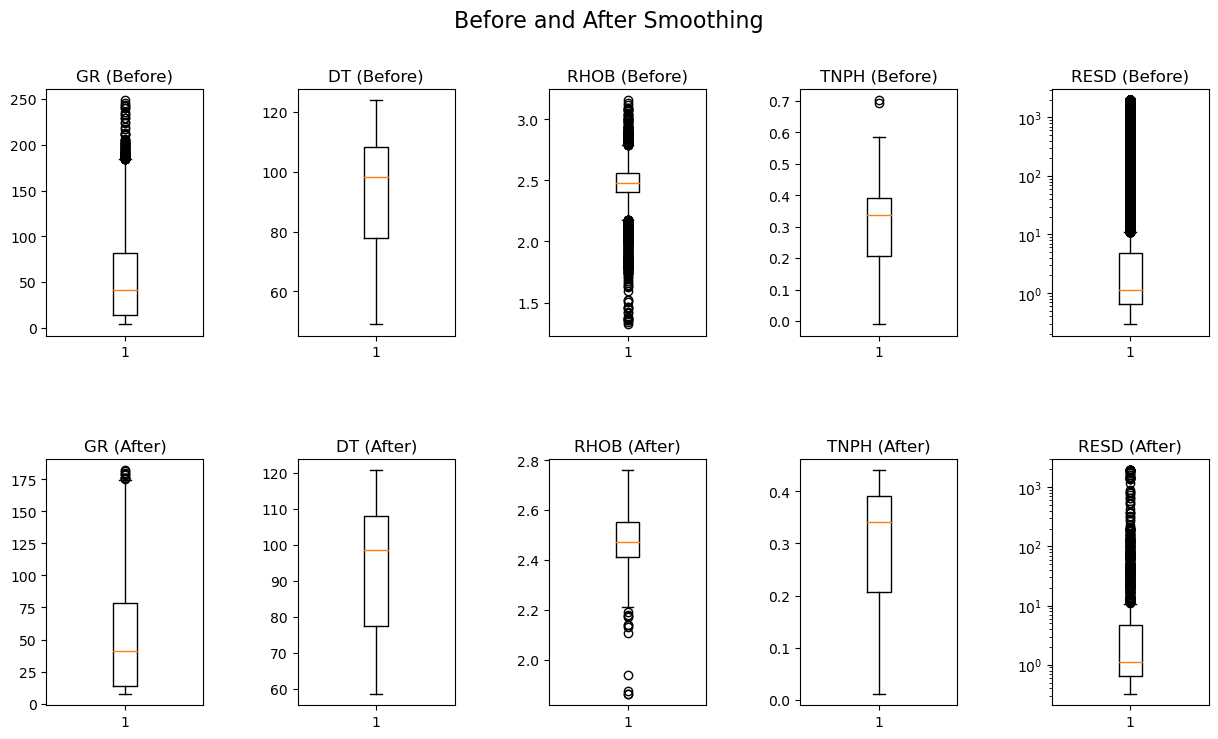

In [36]:
import matplotlib.pyplot as plt

# Create the figure with specific dimensions
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
plt.subplots_adjust(wspace=.6, hspace=0.5)

# First row: Before smoothing plots
axs[0, 0].boxplot(df['GR'].dropna())
axs[0, 0].set_title('GR (Before)')
axs[0, 1].boxplot(df['DT'].dropna())
axs[0, 1].set_title('DT (Before)')
axs[0, 2].boxplot(df['RHOB'].dropna())
axs[0, 2].set_title('RHOB (Before)')
axs[0, 3].boxplot(df['TNPH'].dropna())
axs[0, 3].set_title('TNPH (Before)')
axs[0, 4].boxplot(df['RESD'].dropna())
axs[0, 4].set_yscale('log')
axs[0, 4].set_title('RESD (Before)')

# Second row: After smoothing plots
axs[1, 0].boxplot(df_sort['GR_filt'].dropna())
axs[1, 0].set_title('GR (After)')
axs[1, 1].boxplot(df_sort['DT_filt'].dropna())
axs[1, 1].set_title('DT (After)')
axs[1, 2].boxplot(df_sort['RHOB_filt'].dropna())
axs[1, 2].set_title('RHOB (After)')
axs[1, 3].boxplot(df_sort['TNPH_filt'].dropna())
axs[1, 3].set_title('TNPH (After)')
axs[1, 4].boxplot(df_sort['RESD_filt'].dropna())
axs[1, 4].set_yscale('log')
axs[1, 4].set_title('RESD (After)')

# Add a global title
fig.suptitle("Before and After Smoothing", fontsize=16)

# Display the plot
plt.savefig("p5.png",dpi=400)
plt.show()


DEPTH     BS     CALI        GR       DT    RHOB     TNPH    RESS  \
25792  3930.7008  12.25  12.4842  140.9656  77.1491  2.8126  0.28823  4.6900   
25793  3930.8532  12.25  12.5407  150.2494  76.1534  2.8043  0.29812  4.0761   
25794  3931.0056  12.25  12.5519  150.4504  75.6770  2.7804  0.30283  3.9563   
25795  3931.1580  12.25  12.5181  142.4614  76.5705  2.7452  0.30499  4.4026   
25796  3931.3104  12.25  12.4842  137.6260  77.0579  2.7459  0.27262  4.9909   
...          ...    ...      ...       ...      ...     ...      ...     ...   
31099  4739.4876   8.50   8.5145  187.6141  80.6610  2.6756  0.30019  5.9078   
31100  4739.6400   8.50   8.5145  189.0984  80.0609  2.6846  0.29695  5.8805   
31101  4739.7924   8.50   8.5040  185.5540  78.9646  2.6716  0.29964  5.8813   
31102  4739.9448   8.50   8.4874  183.1134  78.6658  2.6791  0.30103  5.9311   
31103  4740.0972   8.50   8.4581  184.0362  78.1588  2.6926  0.30509  5.9292   

         RESD      DTSH    VPVS        x1  
25792  3.8753  131.7044  1.6155  0.486765  
25793  3.5553  132.6980  1.6490  0.618146  
25794  3.4605  131.2091  1.7020  0.620991  
25795  3.7306  130.4003  1.6768  0.507933  
25796  4.1313  128.8238  1.6990  0.439504  
...       ...       ...     ...       ...  
31099  5.2892  153.4561  1.8998  1.146920  
31100  5.2901  153.2509  1.9116  1.167925  
31101  5.3035  153.2724  1.9401  1.117766  
31102  5.3424  155.4383  1.9750  1.083227  
31103  5.3567  156.8542  2.0162  1.096287  

[5154 rows x 12 columns]

In [40]:
logs11=['GR','DT','RHOB','TNPH','RESS','RESD','DTSH','PEF']
p111=df[logs11]
p111

GR  DT  RHOB  TNPH  RESS  RESD  DTSH  PEF
0     NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
1     NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
2     NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
3     NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
4     NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
...    ..  ..   ...   ...   ...   ...   ...  ...
31363 NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
31364 NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
31365 NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
31366 NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN
31367 NaN NaN   NaN   NaN   NaN   NaN   NaN  NaN

[31368 rows x 8 columns]

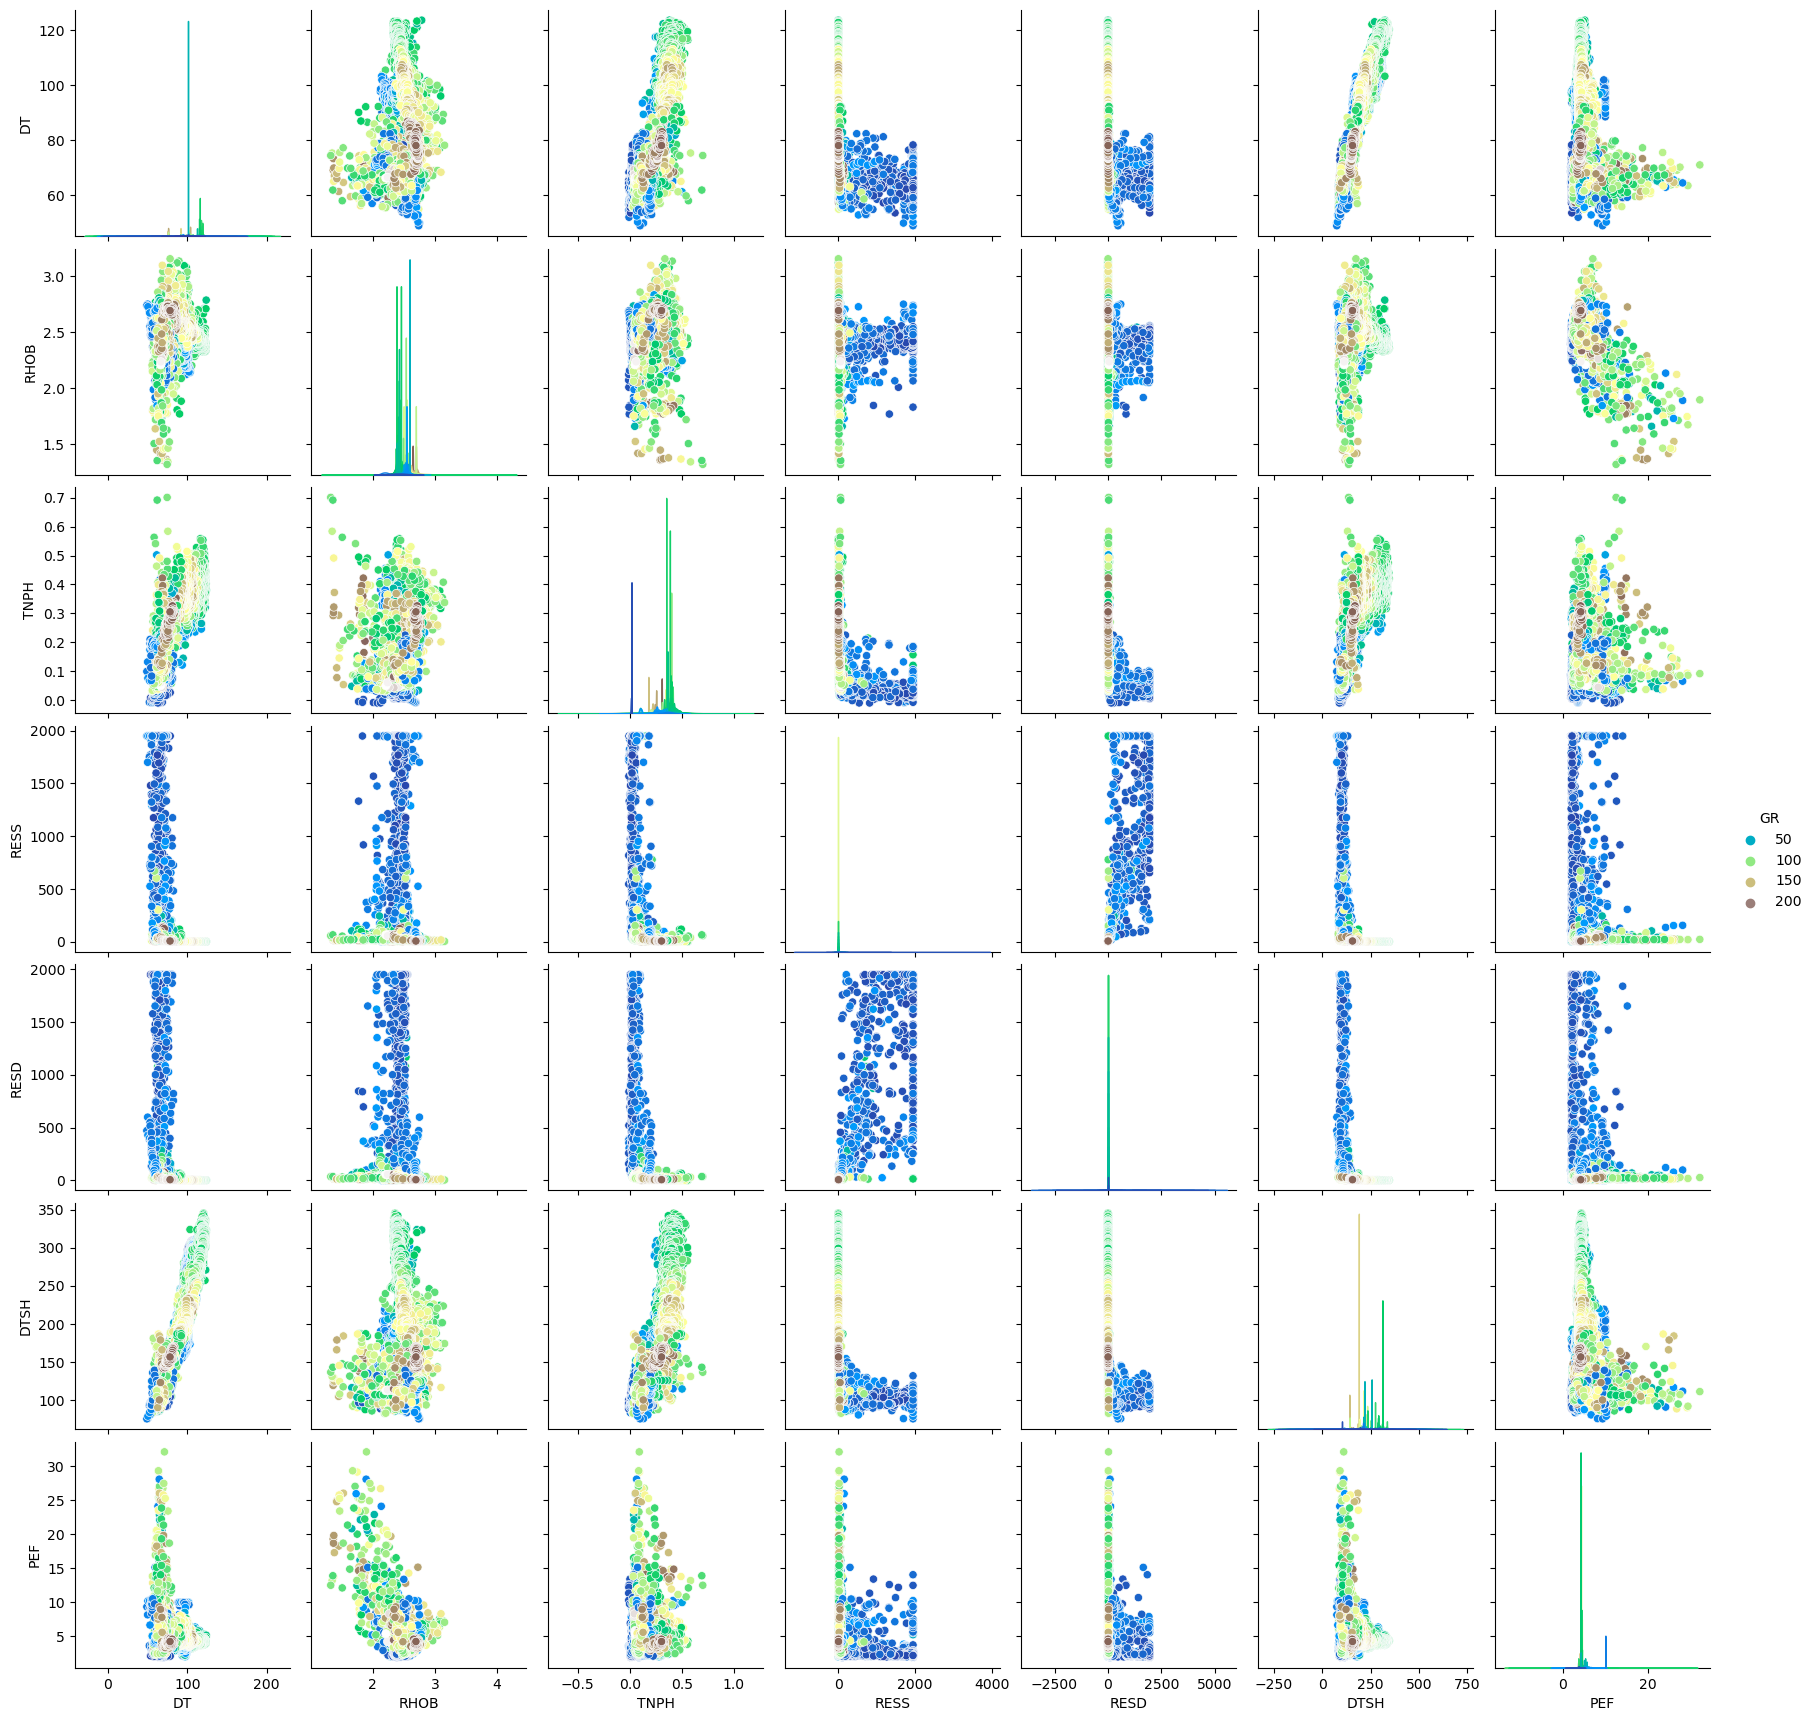

In [48]:
import seaborn as sns 
sns.pairplot(p111,hue="GR", palette="terrain")
plt.savefig("p6.png",dpi=400)

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\827061219.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(241)


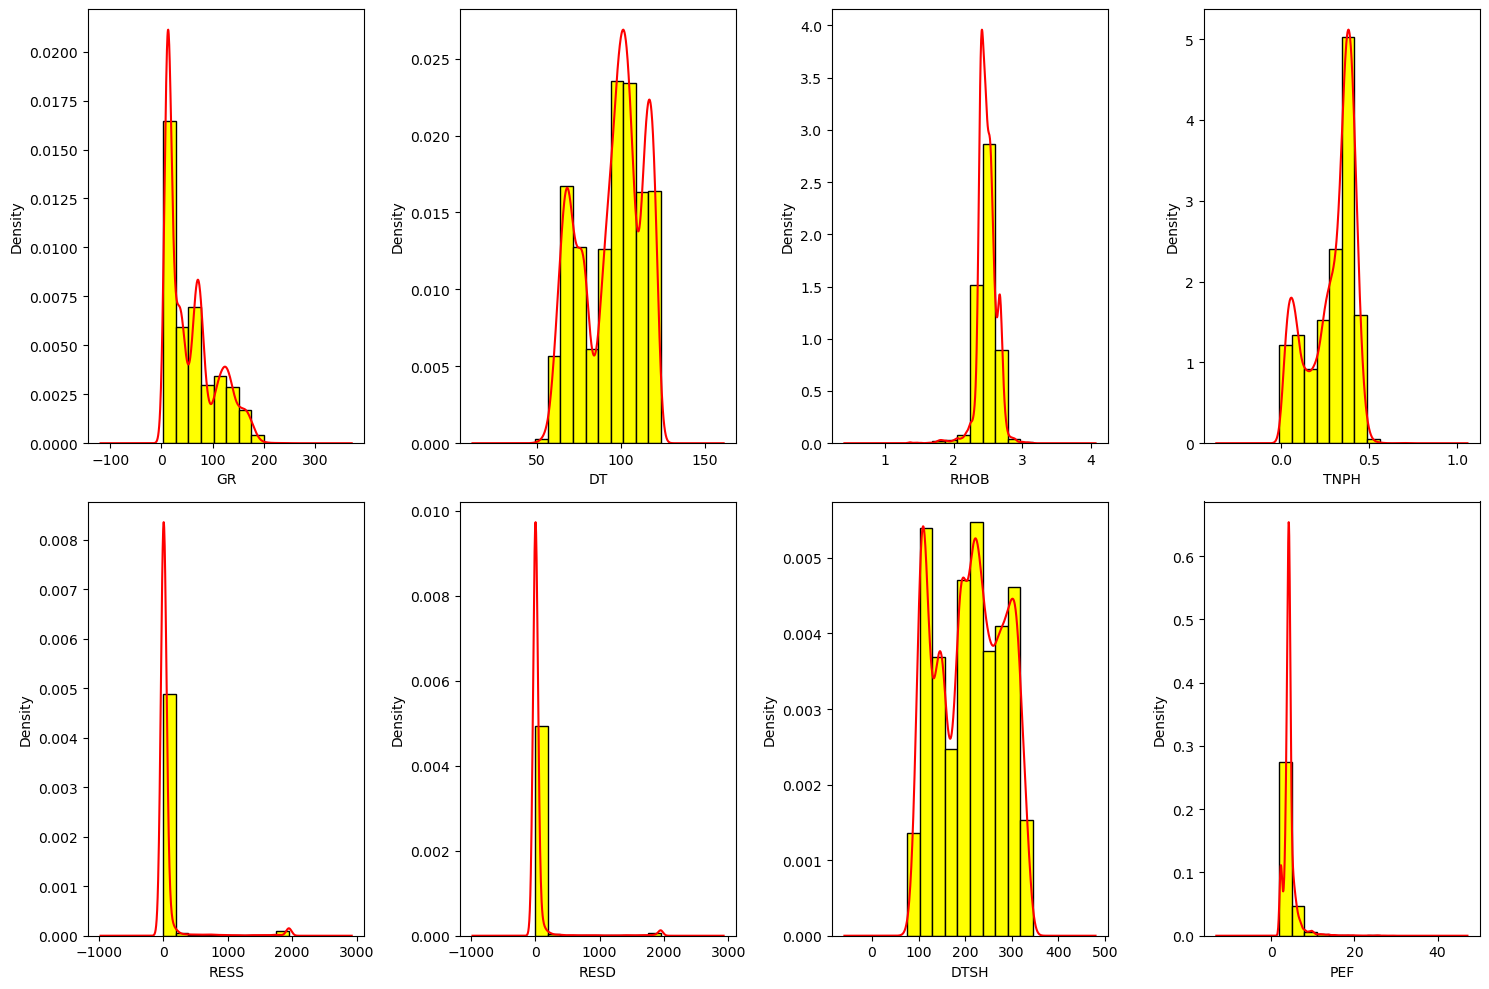

In [57]:
plt.subplots(figsize=(15,10))
plt.subplots_adjust(wspace=0.4)
plt.subplot(241)
p111.GR.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.GR.plot(kind="kde",color="r")
plt.xlabel("GR")

plt.subplot(242)
p111.DT.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.DT.plot(kind="kde",color="r")
plt.xlabel("DT")

plt.subplot(243)
p111.RHOB.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.RHOB.plot(kind="kde",color="r")
plt.xlabel("RHOB")

plt.subplot(244)
p111.TNPH.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.TNPH.plot(kind="kde",color="r")
plt.xlabel("TNPH")

plt.subplot(245)
p111.RESS.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.RESS.plot(kind="kde",color="r")
plt.xlabel("RESS")

plt.subplot(246)
p111.RESD.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.RESD.plot(kind="kde",color="r")
plt.xlabel("RESD")

plt.subplot(247)
p111.DTSH.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.DTSH.plot(kind="kde",color="r")
plt.xlabel("DTSH")

plt.subplot(248)
p111.PEF.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.PEF.plot(kind="kde",color="r")
plt.xlabel("PEF")

plt.tight_layout()

plt.savefig("p7.png",dpi=400)

In [60]:
p5=p111.GR.quantile(0.05)
p95=p111.GR.quantile(0.95)

9.1899 151.97702499999997


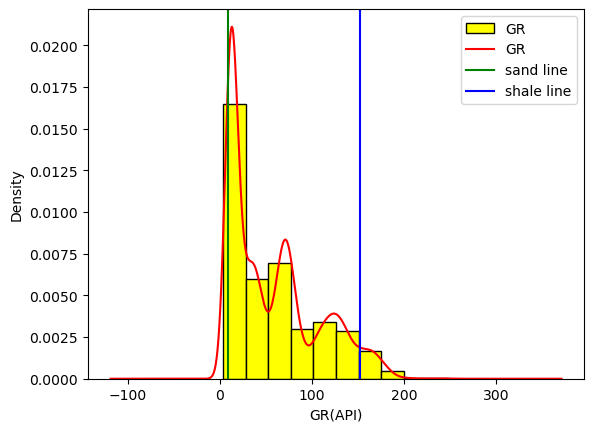

In [62]:
p111.GR.plot(kind="hist",edgecolor="black",density=True,color="yellow")
p111.GR.plot(kind="kde",color="red")
p5=p111.GR.quantile(0.05)
p95=p111.GR.quantile(0.95)
print(p5,p95)
plt.axvline(p5,label="sand line",color="green")
plt.axvline(p95,label="shale line",color="blue")
plt.xlabel("GR(API)")

plt.legend()
plt.savefig("p8.png",dpi=400)

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_1676\2319289500.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31363   NaN
31364   NaN
31365   NaN
31366   NaN
31367   NaN
Name: GR, Length: 31368, dtype: float64


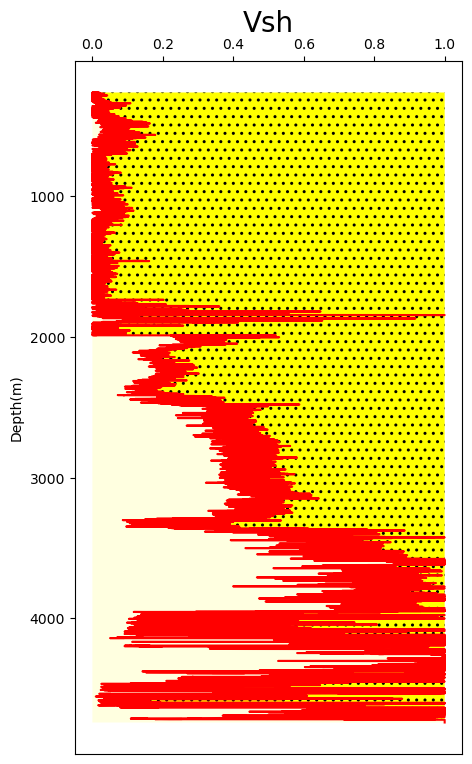

In [69]:
plt.subplots(figsize=(5,9))
def vsh(gr_min,gr_max,gr_log):
    return((gr_log-gr_min)/(gr_max-gr_min))
x1=vsh(9.1899,151.97702499999997,p111.GR)
for i in range(0,31368):
    if x1[i] < 0:
        x1[i]=0
    if x1[i] > 1:
        x1[i] = 1

ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax.plot(x1,df.DEPTH,color="red")
ax.set_xlabel("Vsh", fontsize=20)
ax.set_ylabel("Depth(m)",fontsize=10)
#ax.set_ylim(4218,3911.5)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.fill_betweenx(df.DEPTH,0,x1,facecolor="lightyellow")
plt.fill_betweenx(df.DEPTH,1,x1,facecolor="yellow",hatch='..')
ax.invert_yaxis()
print(x1)
    
plt.savefig("p9.png",dpi=400)

Text(0.5, 0, 'RHOB')

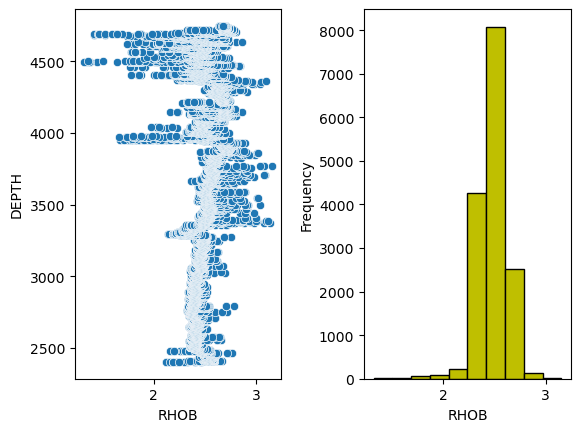

In [72]:
plt.subplots_adjust(wspace=0.4)
plt.subplot(121)
sns.scatterplot(x=p111.RHOB,y=df.DEPTH)
#plt.ylim(4218,3911.5)
plt.subplot(122)
p111.RHOB.plot(kind="hist",edgecolor="k",color="y")
plt.xlabel("RHOB")

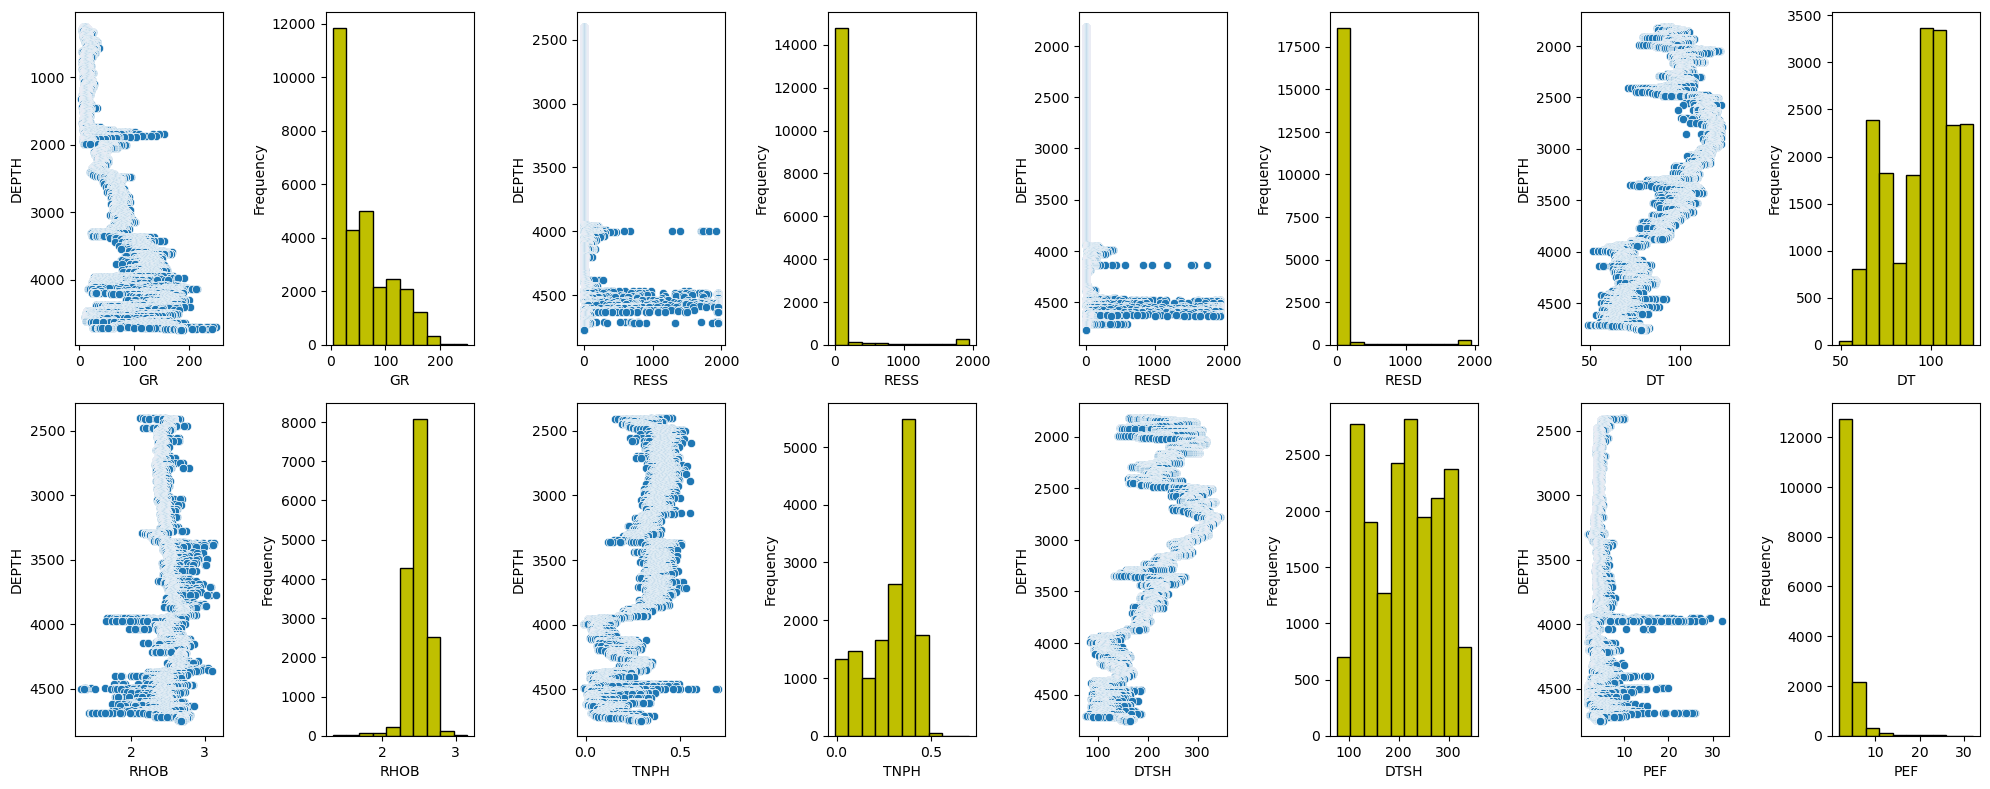

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['GR', 'RESS', 'RESD', 'DT', 'RHOB', 'TNPH', 'DTSH', 'PEF']

# Create a figure with 2 rows and 8 columns (scatter + histogram per variable)
fig, axes = plt.subplots(2, 8, figsize=(20, 8))

plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through each variable to create scatter and histogram plots
for i, var in enumerate(variables):
    row = i // 4  # Determine the row (0 or 1)
    col_scatter = (i % 4) * 2  # Determine the column index for scatter plot (0, 2, 4, 6)
    col_hist = col_scatter + 1  # Determine the column index for histogram (1, 3, 5, 7)

    # Scatter plot (left side)
    sns.scatterplot(x=p111[var], y=df.DEPTH, ax=axes[row, col_scatter])
    axes[row, col_scatter].invert_yaxis()  # Invert y-axis to match depth plots
    axes[row, col_scatter].set_xlabel(var)
    axes[row, col_scatter].set_ylabel('DEPTH')

    # Histogram (right side)
    p111[var].plot(kind="hist", ax=axes[row, col_hist], edgecolor="k", color="y")
    axes[row, col_hist].set_xlabel(var)

# Use tight layout for better spacing and save the figure
plt.tight_layout()
plt.savefig("p10.png", dpi=400)
plt.show()


In [137]:
shale

DEPTH    BS    CALI    DENS    DENSC     DRHO       DT     DTCO  \
11710  1784.604  17.5     NaN     NaN      NaN      NaN      NaN      NaN   
11720  1786.128  17.5     NaN     NaN      NaN      NaN      NaN      NaN   
12020  1831.848  17.5     NaN     NaN      NaN      NaN  91.3759  91.3759   
12030  1833.372  16.0     NaN     NaN      NaN      NaN  94.9308  94.9308   
12090  1842.516  16.0     NaN     NaN      NaN      NaN  98.6359  98.6359   
...         ...   ...     ...     ...      ...      ...      ...      ...   
31060  4733.544   8.5  8.4579  2.7224  0.00233  0.00233  77.8684  77.8684   
31070  4735.068   8.5  8.5322  2.6974  0.00220  0.00220  77.2541  77.2541   
31080  4736.592   8.5  8.4937  2.6646  0.01072  0.01072  80.4448  80.4448   
31090  4738.116   8.5  8.5026  2.6915  0.03713  0.03713  82.0422  82.0422   
31100  4739.640   8.5  8.5145  2.6846 -0.00399 -0.00399  80.0609  80.0609   

           DTSH      DTSM  ...        U    VPVS            Sv      Phydro  \
11710       NaN       NaN  ...      NaN     NaN   5952.162594  2587.89678   
11720       NaN       NaN  ...      NaN     NaN   5957.245134  2590.10658   
12020  192.3228  192.3228  ...      NaN     NaN   6109.721334  2656.40058   
12030  200.0230  200.0230  ...      NaN     NaN   6114.803874  2658.61038   
12090  226.4164  226.4164  ...      NaN     NaN   6145.299114  2671.86918   
...         ...       ...  ...      ...     ...           ...         ...   
31060  148.8723  148.8723  ...   9.7697  1.9126  15786.877494  6863.85978   
31070  157.9570  157.9570  ...   9.8371  2.0500  15791.960034  6866.06958   
31080  167.6871  167.6871  ...  11.8896  2.0861  15797.042574  6868.27938   
31090  167.4373  167.4373  ...  10.0215  2.0341  15802.125114  6870.48918   
31100  153.2509  153.2509  ...  10.3382  1.9116  15807.207654  6872.69898   

       RHOB_filt    GR_filt   DT_filt  TNPH_filt  RESD_filt  Porosity  
11710        NaN   51.42905       NaN        NaN        NaN       0.0  
11720        NaN   51.42905       NaN        NaN        NaN       0.0  
12020        NaN   57.04260  92.27305        NaN    0.94125       0.0  
12030        NaN   59.73835  92.25895        NaN    0.92510       0.0  
12090        NaN   51.96775  95.94765        NaN    0.64125       0.0  
...          ...        ...       ...        ...        ...       ...  
31060    2.71500  166.83930  75.79440   0.259945    6.85510       0.0  
31070    2.71685  168.78520  75.65320   0.261125    6.73005       0.0  
31080    2.71170  171.23245  75.88965   0.264280    6.44260       0.0  
31090    2.70915  179.39440  77.05085   0.274750    6.14810       0.0  
31100    2.70035  182.18030  78.19375   0.287190    5.28710       0.0  

[1323 rows x 31 columns]

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
d1=pd.read_excel(r"C:\Users\RAJKUMAR MONDAL\OneDrive\Desktop\pore pressure\Grid Export.xlsx")

In [7]:
d1 = d1[['Base depth (m)','Top depth (m)', 'Formation name']]

In [8]:
d1

Base depth (m)  Top depth (m)           Formation name
0           1175.0          500.0         Oliver Formation
1           3911.5         3365.0  Echuca Shoals Formation
2            500.0          286.8     Barracouta Formation
3           1273.0         1175.0        Cartier Formation
4           1528.0         1273.0          Grebe Formation
5           1818.0         1528.0        Bassett Formation
6           2267.0         1818.0         Puffin Formation
7           2481.0         2267.0        Fenelon Formation
8           2536.0         2481.0      Woolaston Formation
9           3365.0         2536.0       Jamieson Formation
10          4218.0         3911.5         Vulcan Formation
11          4467.0         4218.0         Vulcan Formation
12          4718.0         4467.0         Plover Formation
13          4767.0         4718.0  Mount Goodwin Formation